In [1]:
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.style.use('seaborn-darkgrid')

In [3]:
path = 'data.csv'
data = pd.read_csv(path)

In [4]:
data1 = data.copy()

In [5]:
data.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [6]:
data.shape

(174389, 19)

In [7]:
data.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [8]:
data.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

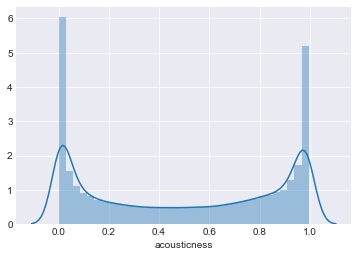

In [10]:
sns.distplot(data['acousticness'])

In [11]:
data.drop(columns = ['artists'], axis = 1, inplace = True)

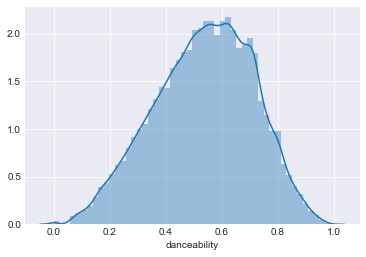

In [12]:
sns.distplot(data['danceability'])

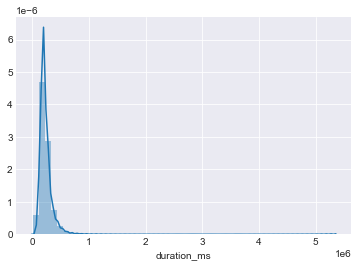

In [13]:
sns.distplot(data['duration_ms'])

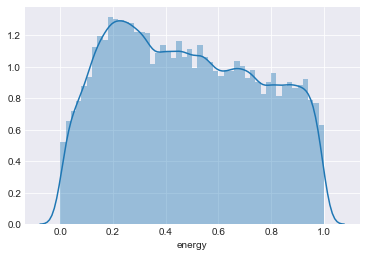

In [14]:
sns.distplot(data['energy'])

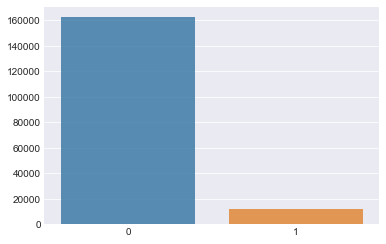

In [15]:
sns.barplot(x=data['explicit'].value_counts().index,y = data['explicit'].value_counts().values,alpha=0.8)

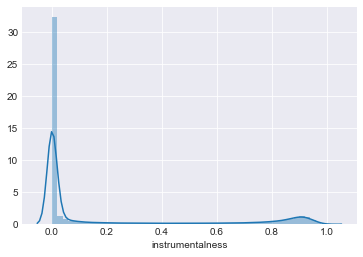

In [16]:
sns.distplot(data['instrumentalness'])

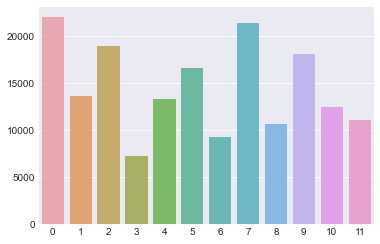

In [17]:
sns.barplot(x=data['key'].value_counts().index,y = data['key'].value_counts().values,alpha=0.8)

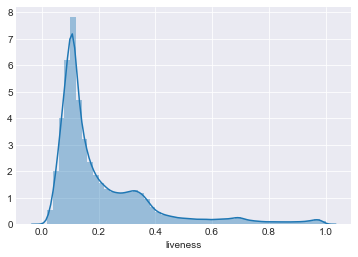

In [18]:
sns.distplot(data['liveness'])

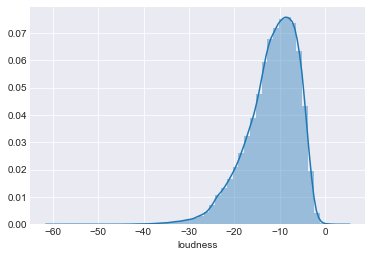

In [19]:
sns.distplot(data['loudness'])

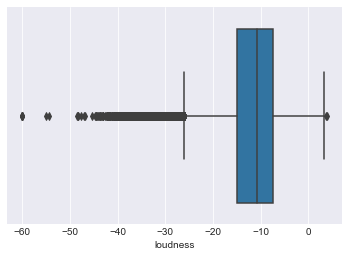

In [20]:
sns.boxplot(data['loudness'])

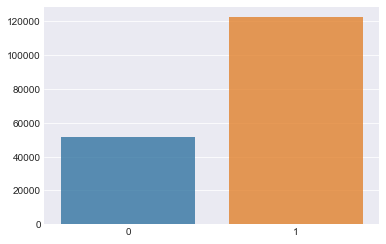

In [21]:
sns.barplot(x=data['mode'].value_counts().index,y = data['mode'].value_counts().values,alpha=0.8)

In [22]:
data.drop(columns = ['name'], axis = 1, inplace = True)

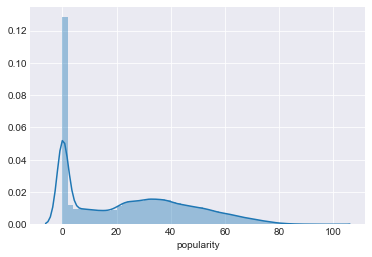

In [23]:
sns.distplot(data['popularity'])

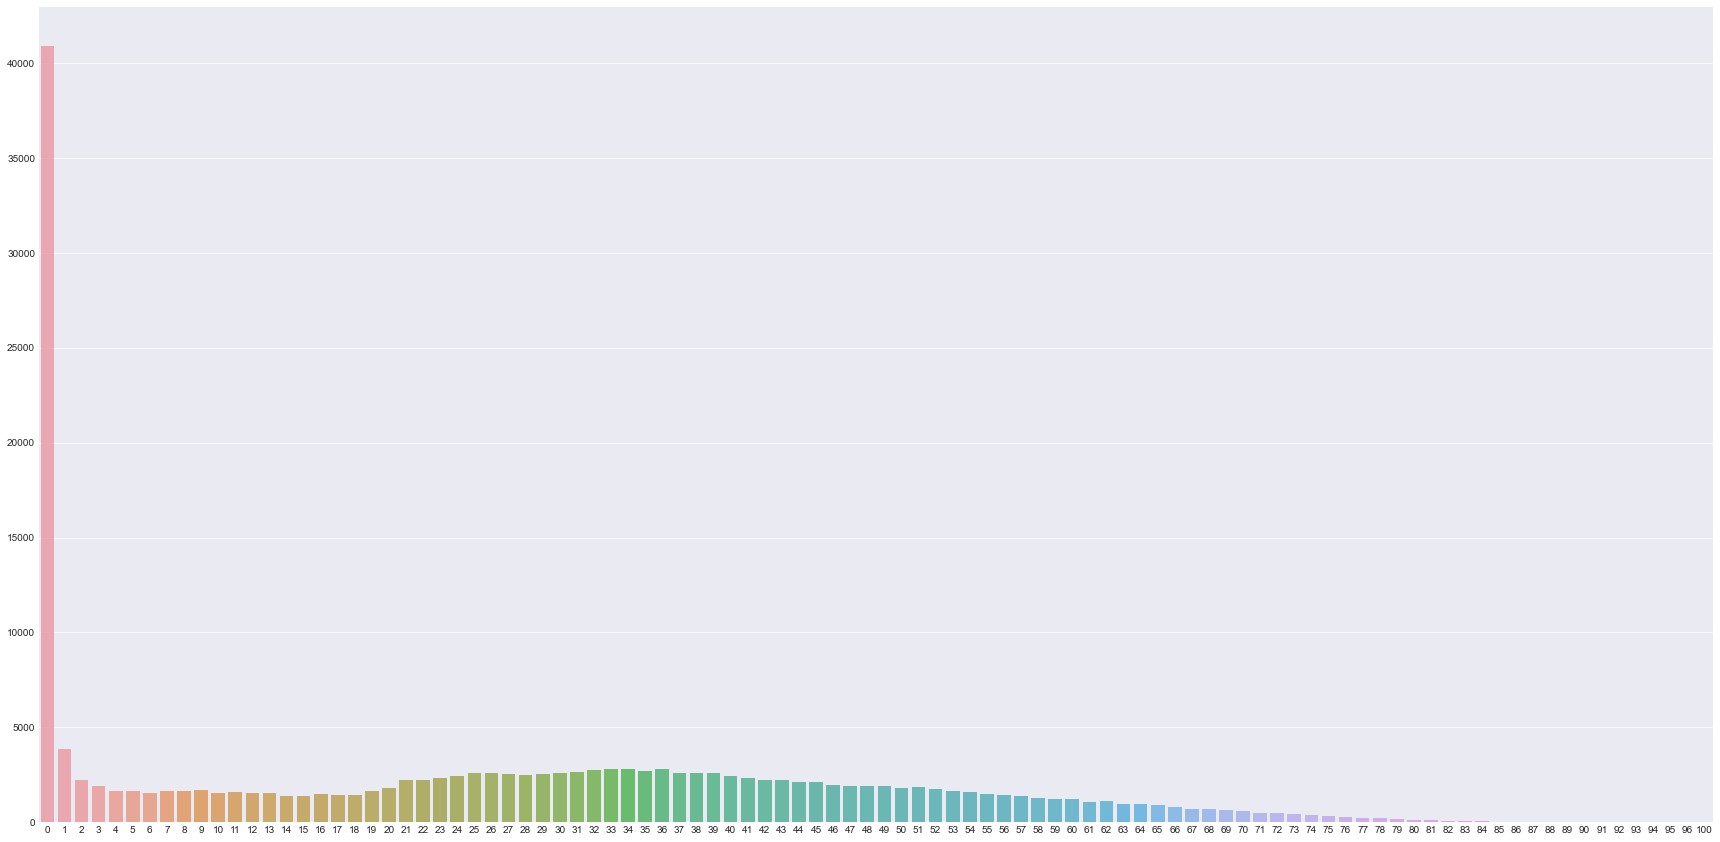

In [24]:
plt.figure(figsize = (30,15))
sns.barplot(x=data['popularity'].value_counts().index,y = data['popularity'].value_counts().values,alpha=0.8)

In [25]:
data.drop(columns = ['release_date'], axis = 1, inplace = True)

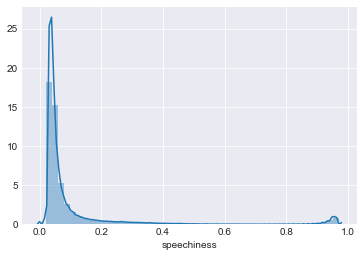

In [26]:
sns.distplot(data['speechiness'])

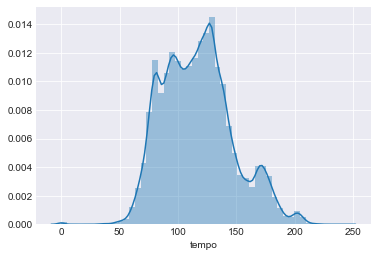

In [27]:
sns.distplot(data['tempo'])

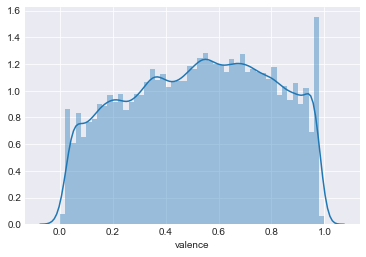

In [28]:
sns.distplot(data['valence'])

Text(0.5, 0, 'Year')

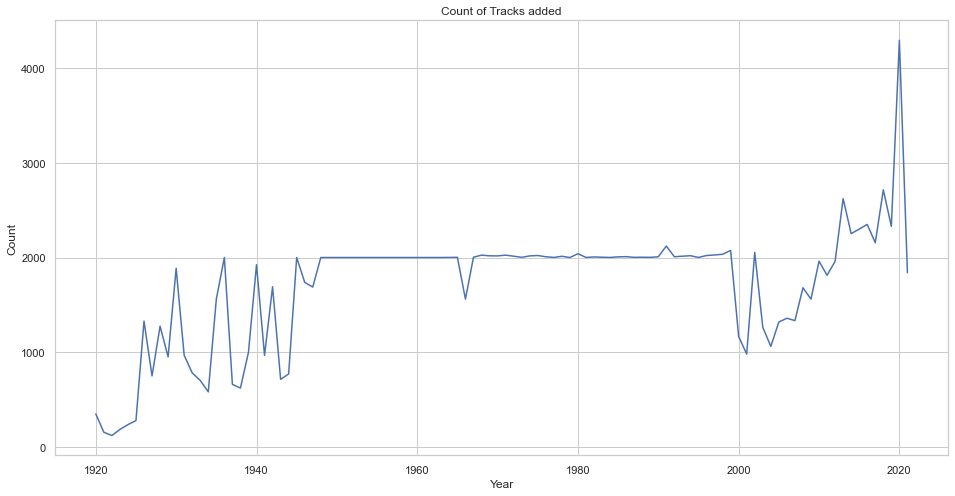

In [29]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
x = data.groupby("year")["id"].count()
ax= sns.lineplot(x.index,x)
ax.set_title('Count of Tracks added')
ax.set_ylabel('Count')
ax.set_xlabel('Year')

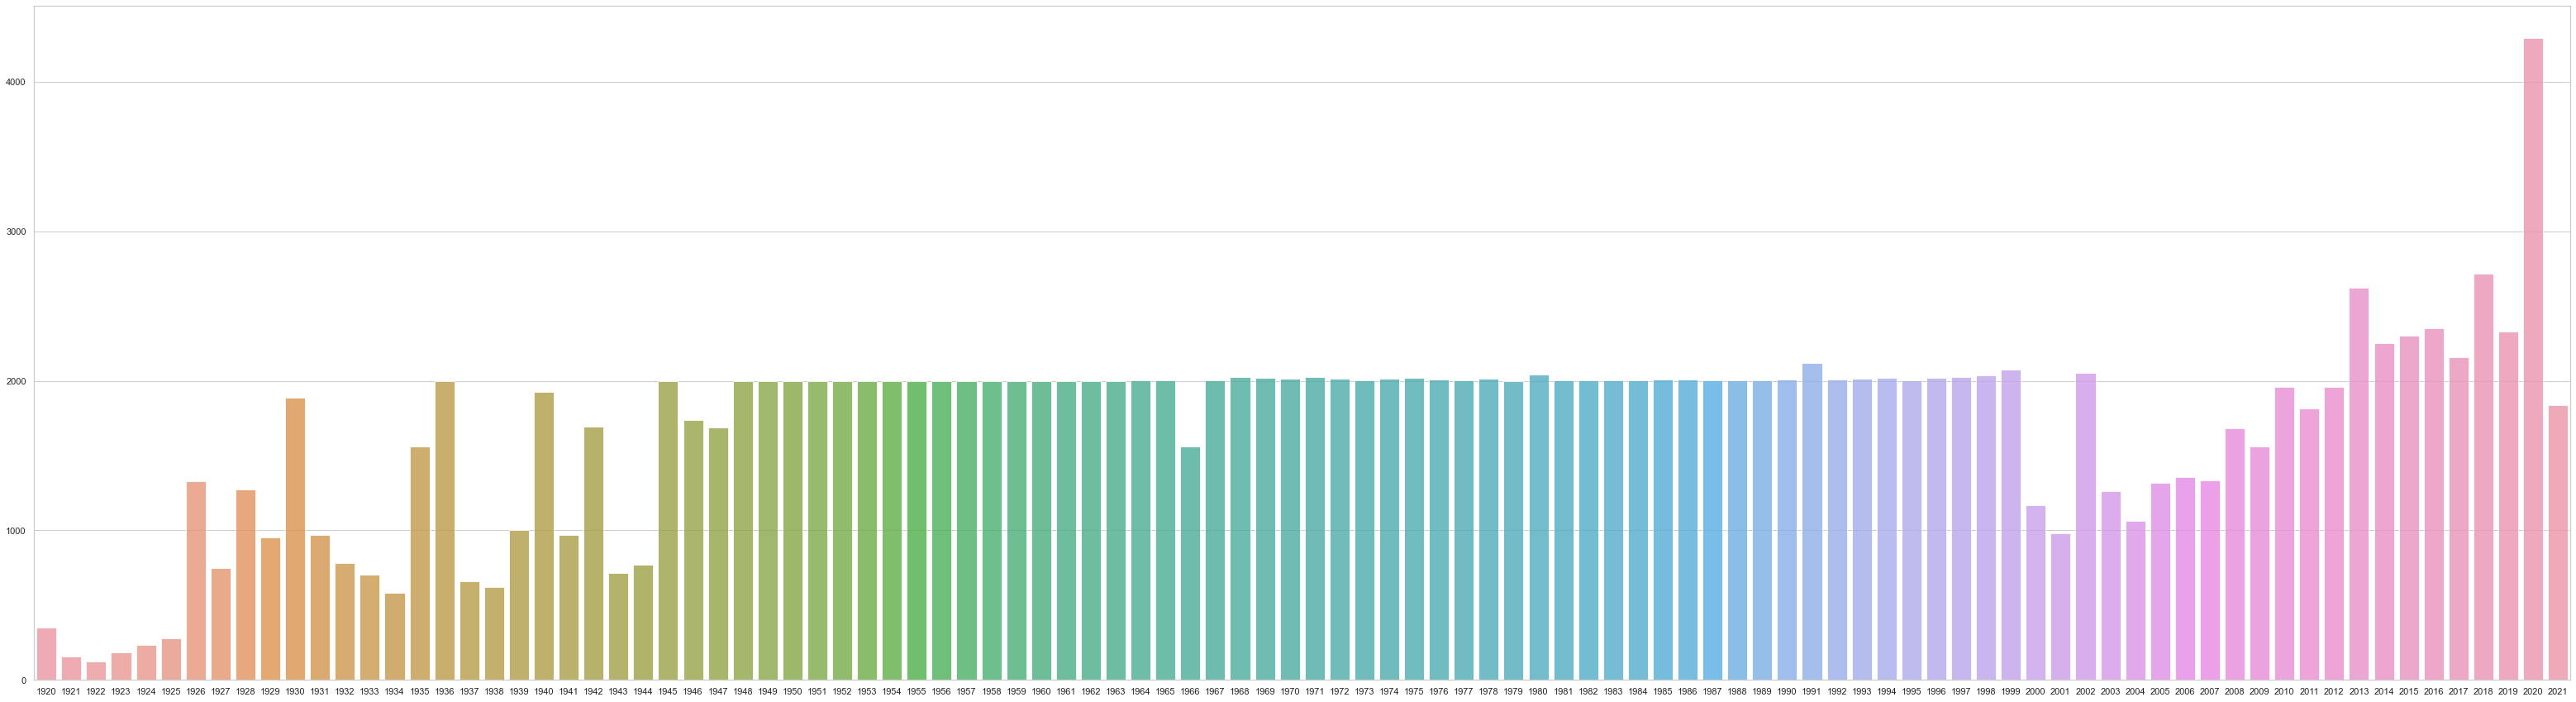

In [30]:
plt.figure(figsize = (55,15))
sns.barplot(x=data['year'].value_counts().index,y = data['year'].value_counts().values,alpha=0.8)

Text(0.5, 0, 'Year')

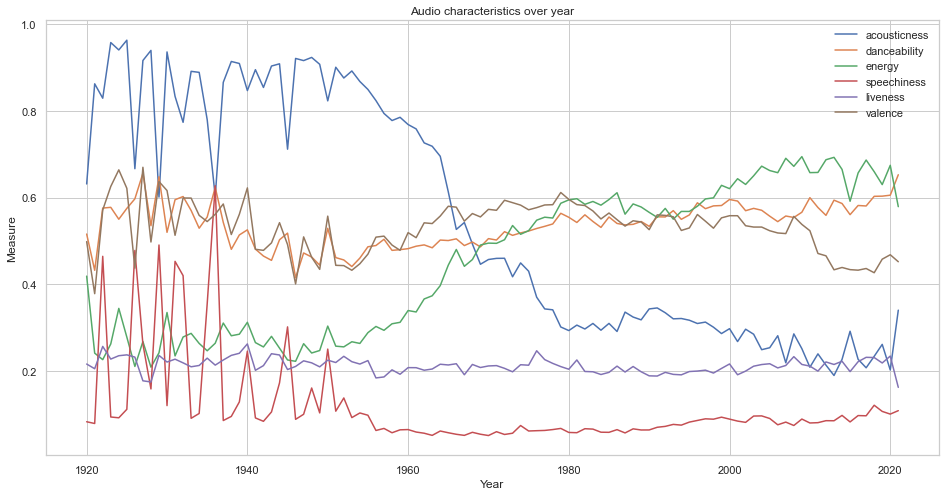

In [31]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

In [32]:
data.drop(columns = ['id'], axis = 1, inplace = True)

# data

In [33]:
data2 = data.copy()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   danceability      174389 non-null  float64
 2   duration_ms       174389 non-null  int64  
 3   energy            174389 non-null  float64
 4   explicit          174389 non-null  int64  
 5   instrumentalness  174389 non-null  float64
 6   key               174389 non-null  int64  
 7   liveness          174389 non-null  float64
 8   loudness          174389 non-null  float64
 9   mode              174389 non-null  int64  
 10  popularity        174389 non-null  int64  
 11  speechiness       174389 non-null  float64
 12  tempo             174389 non-null  float64
 13  valence           174389 non-null  float64
 14  year              174389 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 20.0 MB


# Normalization

In [35]:
SS = StandardScaler()

In [36]:
SS.fit(data)

StandardScaler()

In [37]:
data = SS.transform(data)

In [38]:
data = pd.DataFrame(data)

In [39]:
data3 = data.copy()

# Clustering

## KMeans

In [40]:
data1_temp = data.sample(5000) 

In [41]:
clusters = 16
inertias = []
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1_temp)
    inertias.append(km.inertia_)

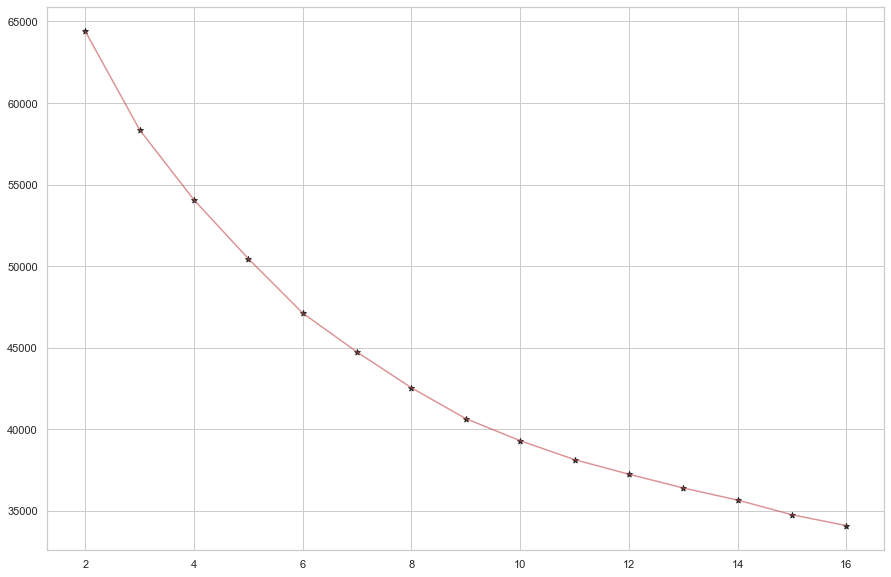

In [42]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), inertias, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), inertias, c = 'r', alpha = 0.6)

score : 0.17557130988157618
score : 0.1878961785744847
score : 0.19641582235694463
score : 0.14626587268591443
score : 0.14963575083757616
score : 0.13144740153973947
score : 0.14346780385530244
score : 0.1425705212519898
score : 0.14269382811248396
score : 0.13409057372449049
score : 0.13051334658253227
score : 0.1262008337877573
score : 0.11824595726917146
score : 0.12525677985032124
score : 0.12518366764469796


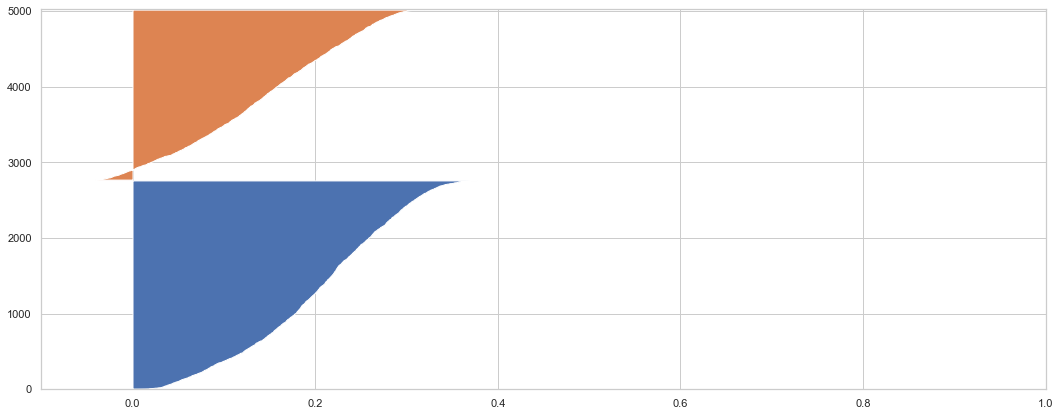

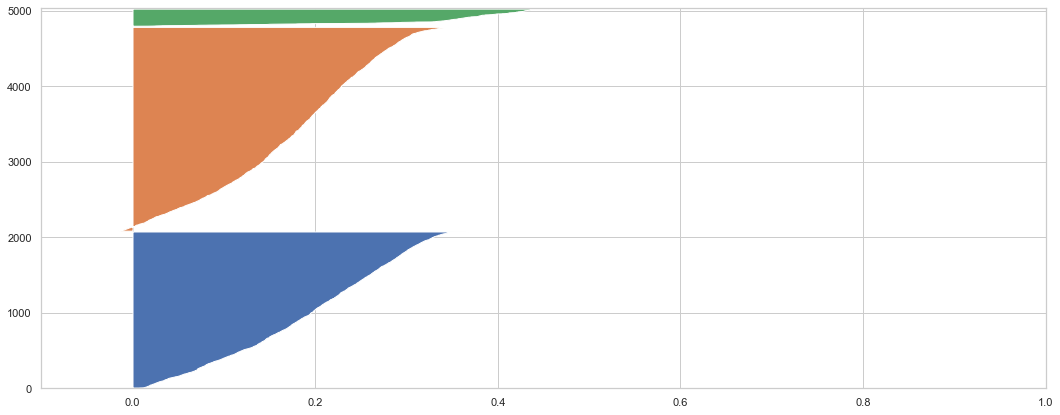

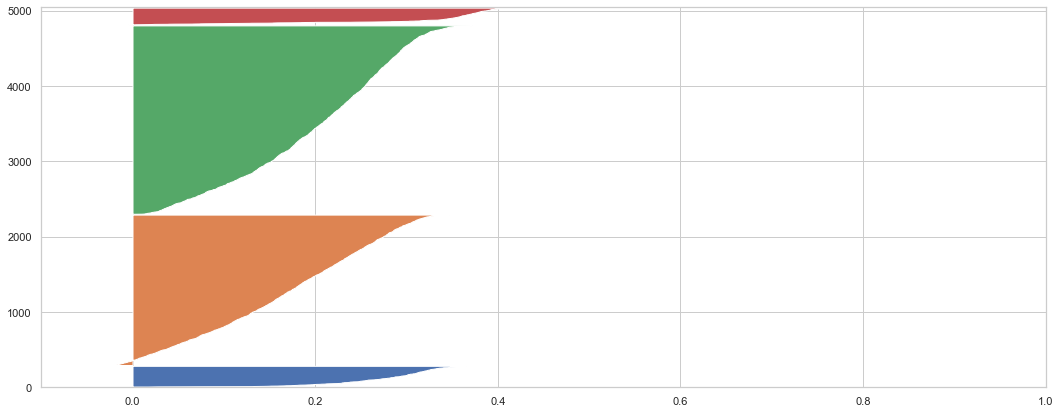

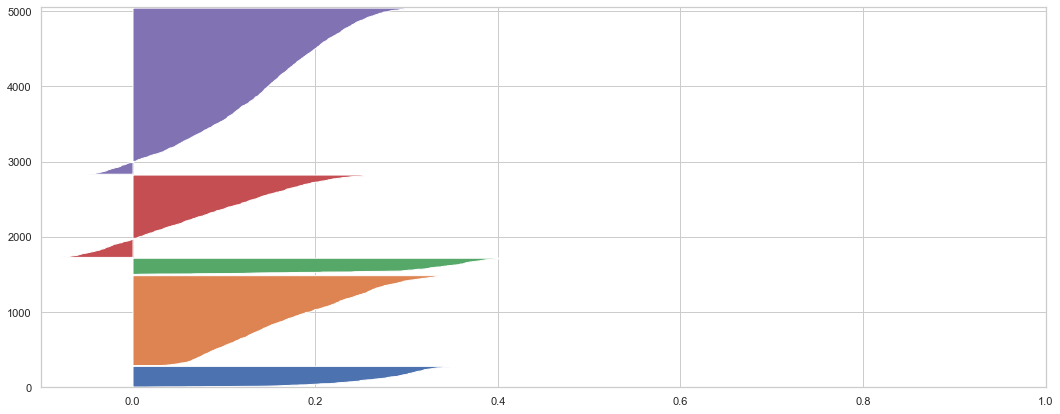

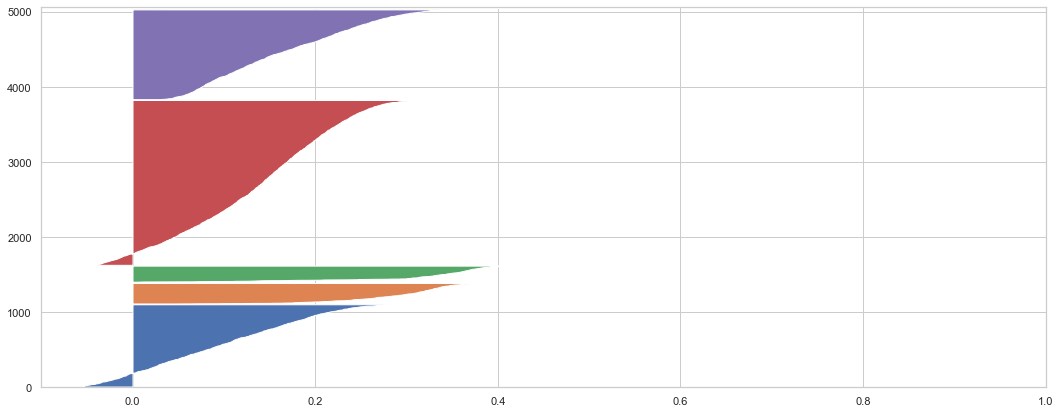

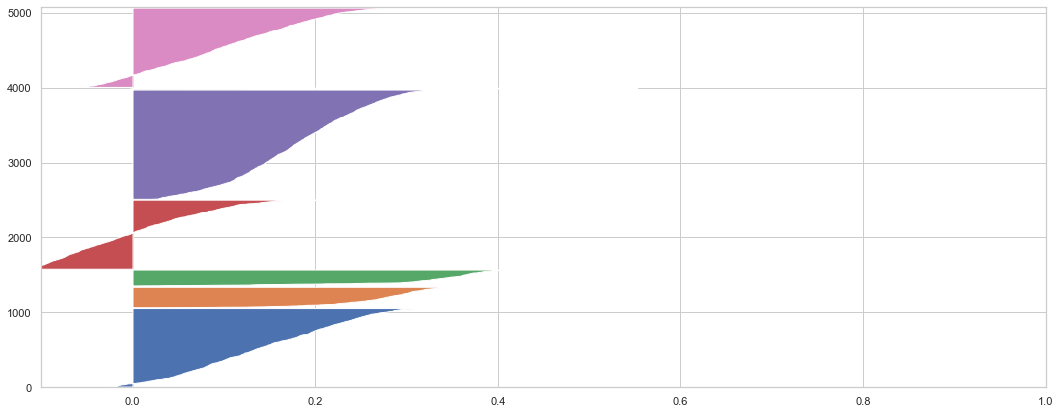

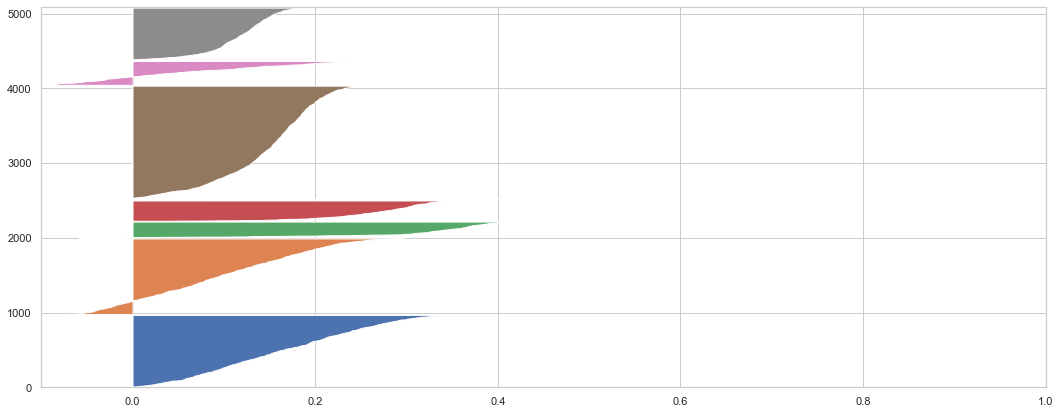

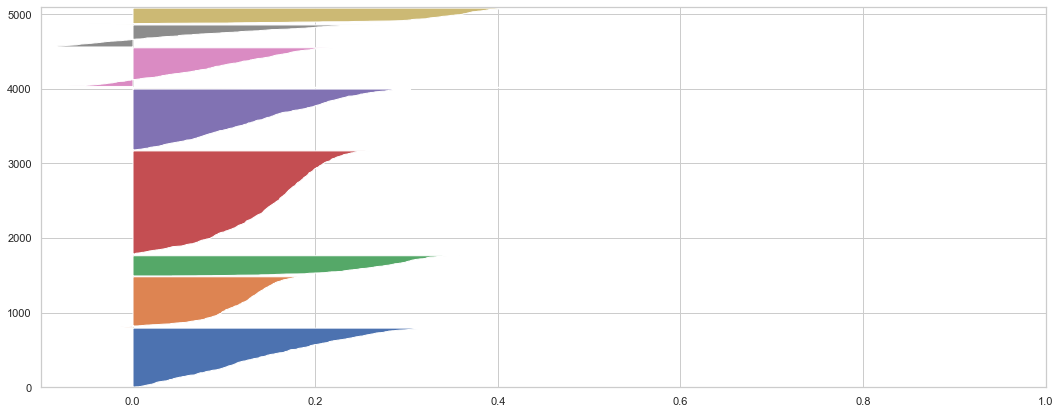

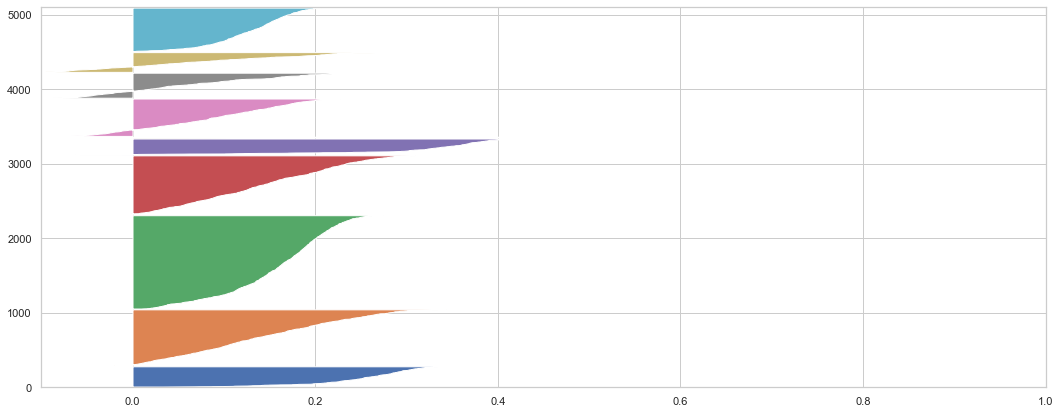

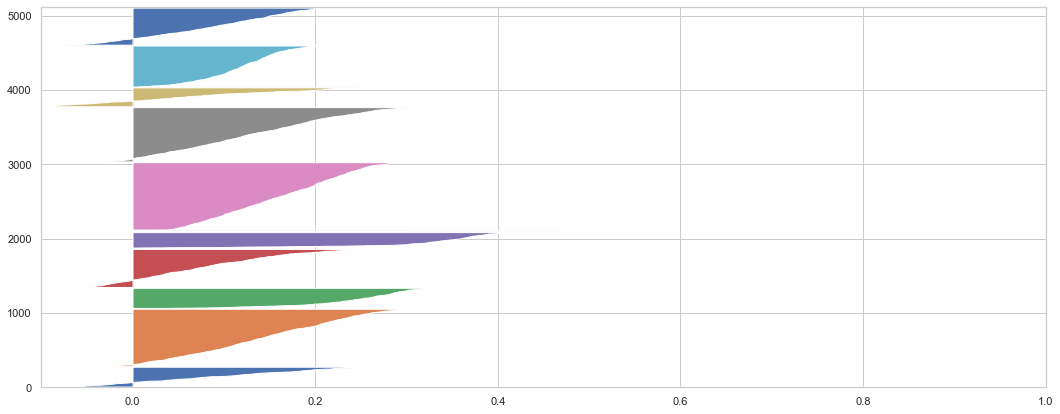

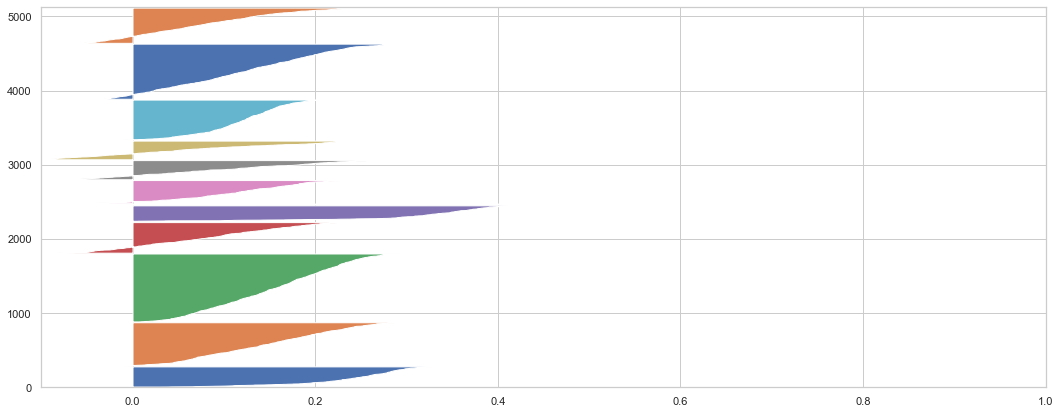

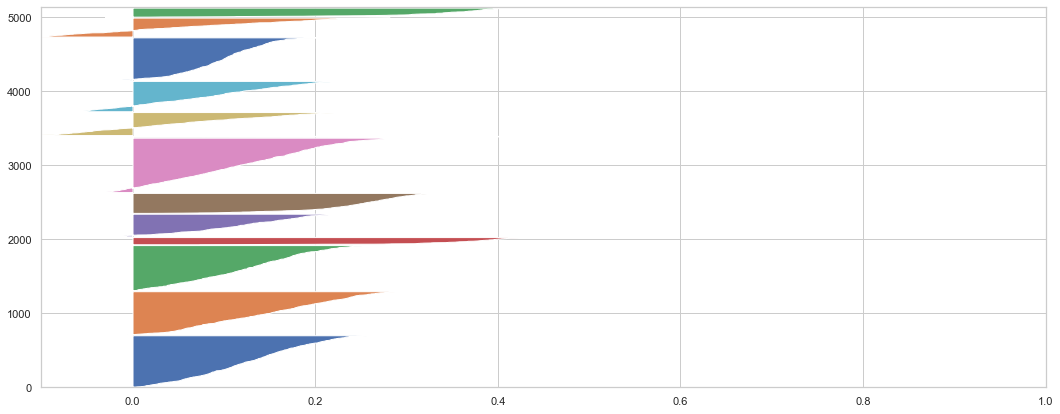

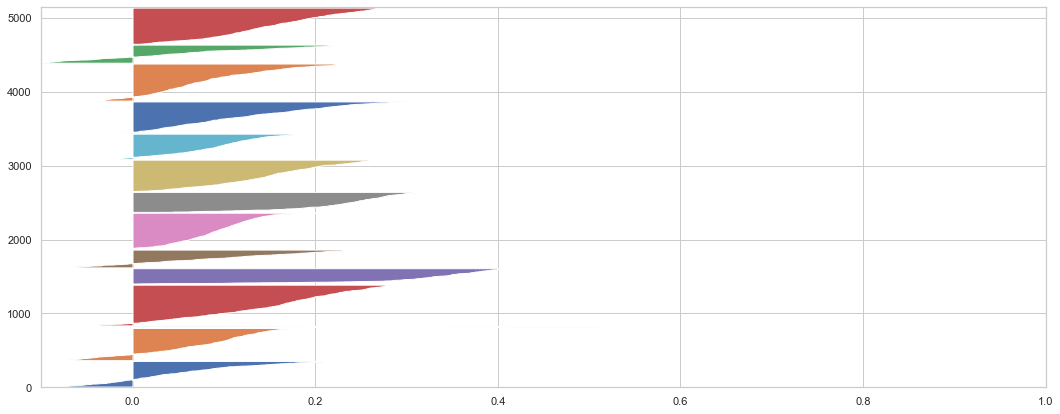

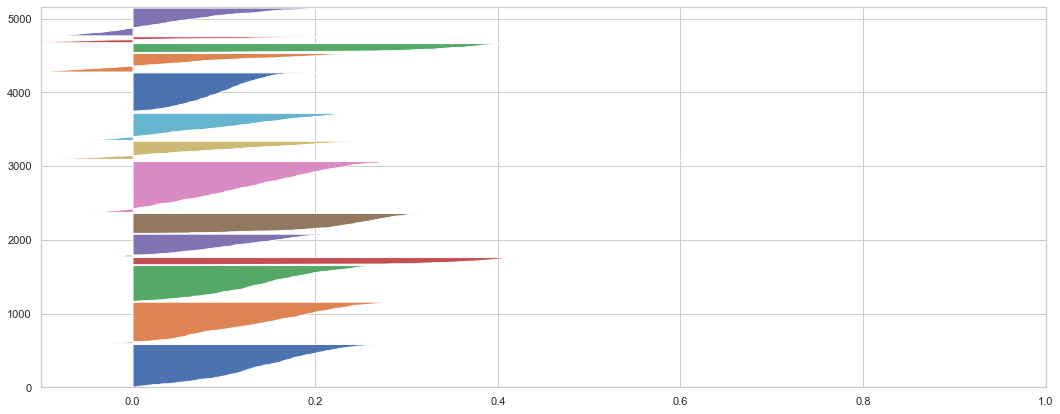

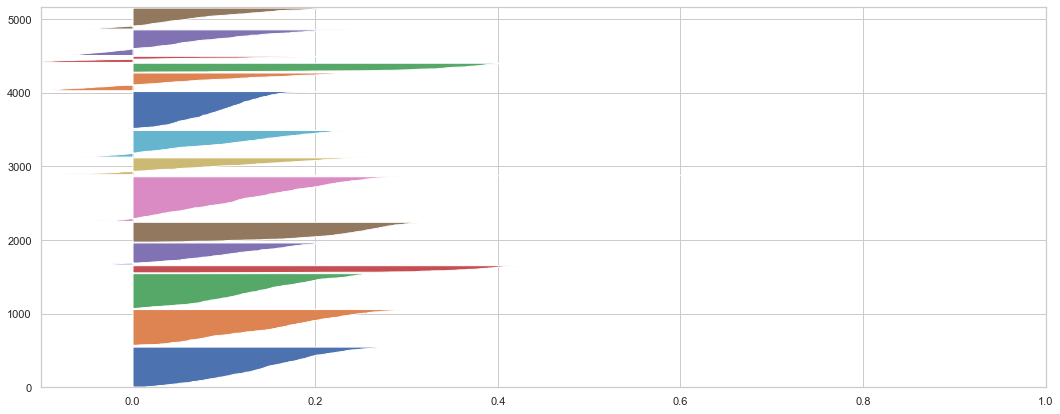

In [43]:
kmeans_silhouette_scores = [] 
clusters = 16
for cluster in range(2, clusters+1):
    km = KMeans(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1_temp)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1_temp) + (cluster + 1) * 10])
    
    score = silhouette_score(data1_temp, y)
    kmeans_silhouette_scores.append(score)
    print('score :',score)

    sil_sample = silhouette_samples(data1_temp, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

## KModes

In [44]:
clusters = 16
costs = []
for cluster in range(2, clusters+1):
    km = KModes(n_clusters = cluster,init='Cao', random_state = 2)
    y = km.fit_predict(data1_temp)
    costs.append(km.cost_)

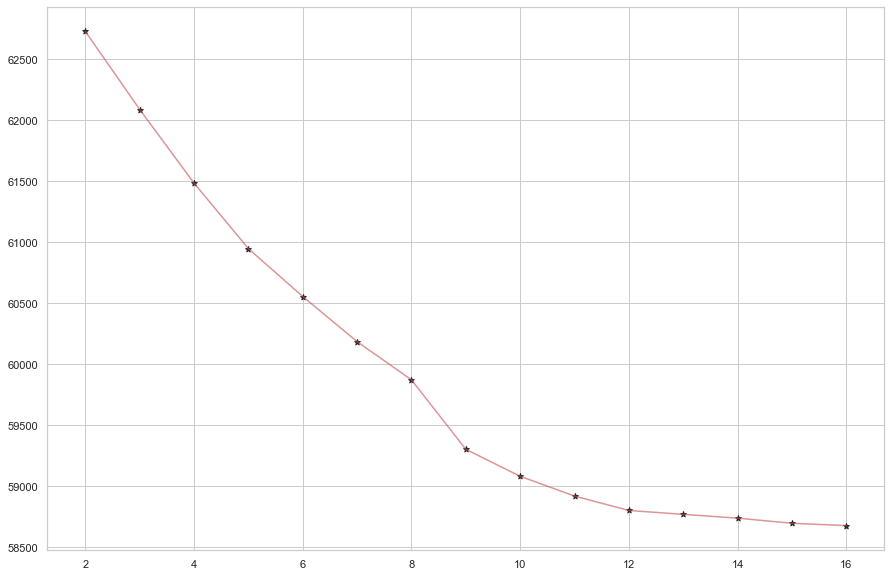

In [45]:
plt.figure(figsize = (15, 10))
plt.scatter(range(2, clusters+1), costs, marker = '*', c = 'k',alpha = 0.9)
plt.plot(range(2, clusters+1), costs, c = 'r', alpha = 0.6)

score : -0.019185246442370886
score : -0.021199317324371865
score : -0.0331439253251513
score : -0.035307465018239136
score : -0.03319228693248603
score : -0.03450740216825649
score : -0.030057020081906444
score : -0.022397522210599183
score : -0.025065689793244493
score : -0.02677047801802877
score : -0.04191948726379293
score : -0.043150974918197485
score : -0.045963562264777054
score : -0.07371031101901786
score : -0.07743894573235555


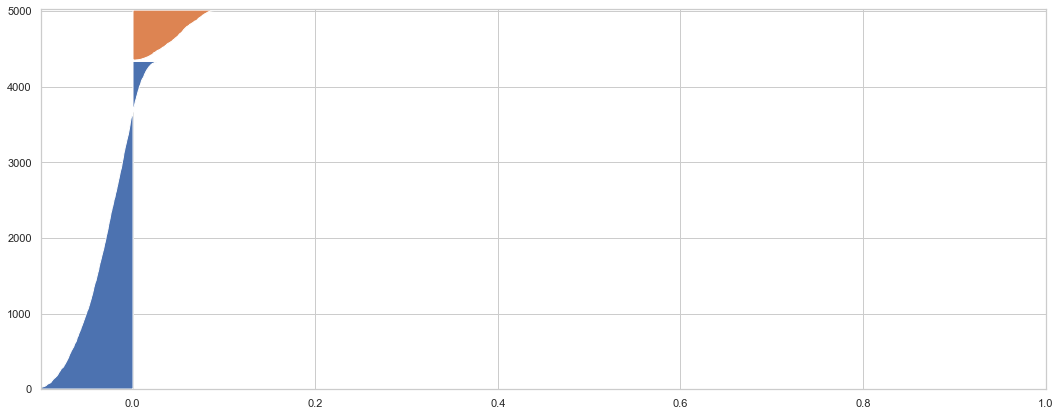

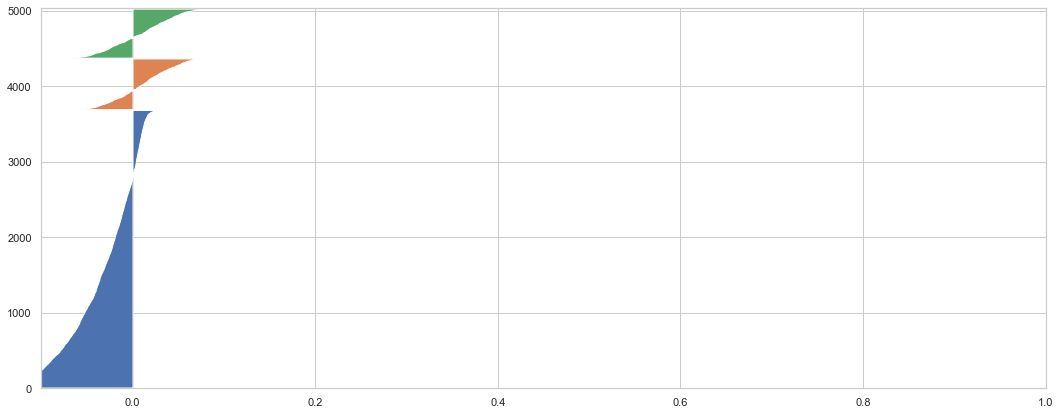

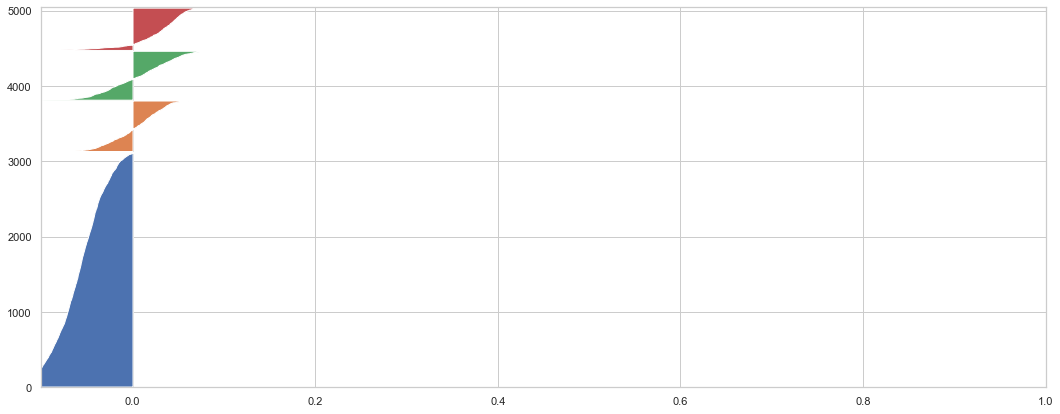

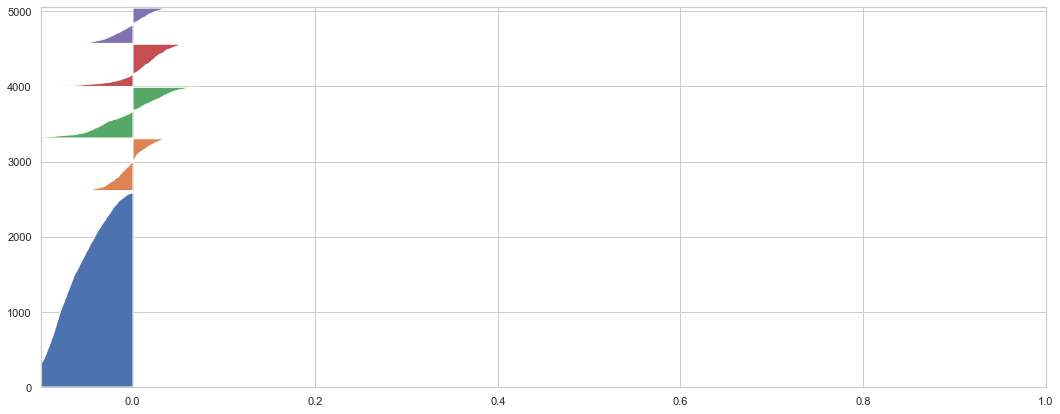

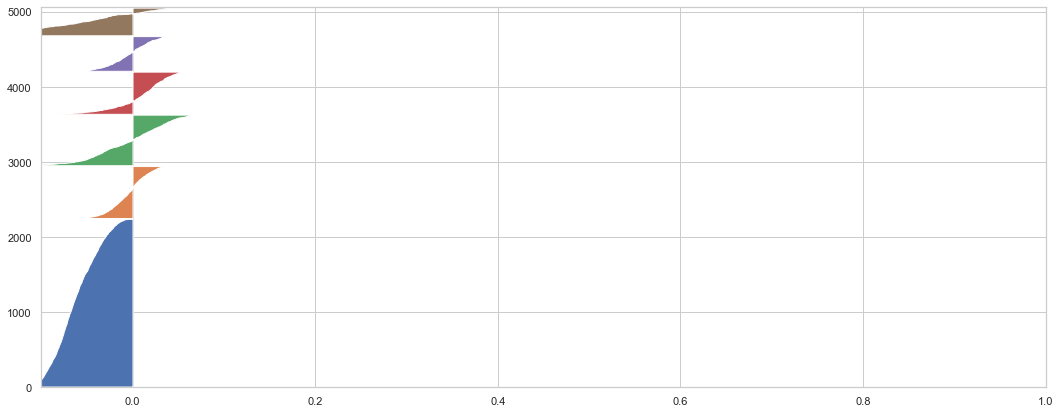

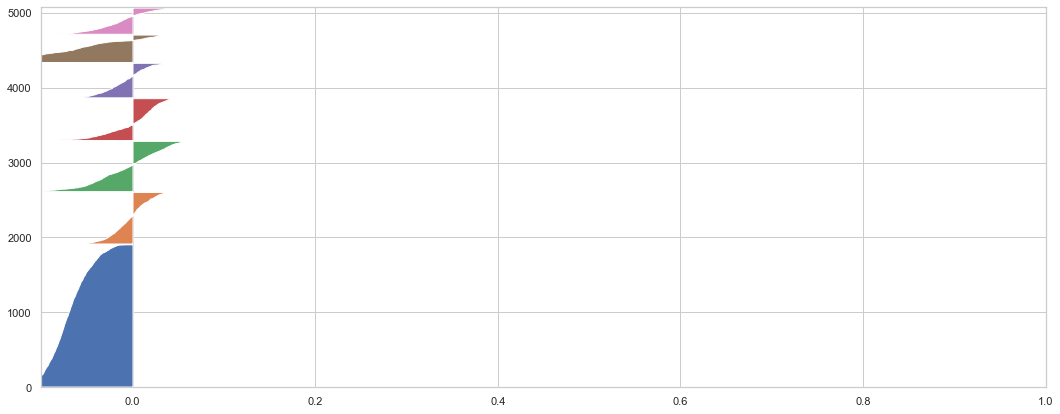

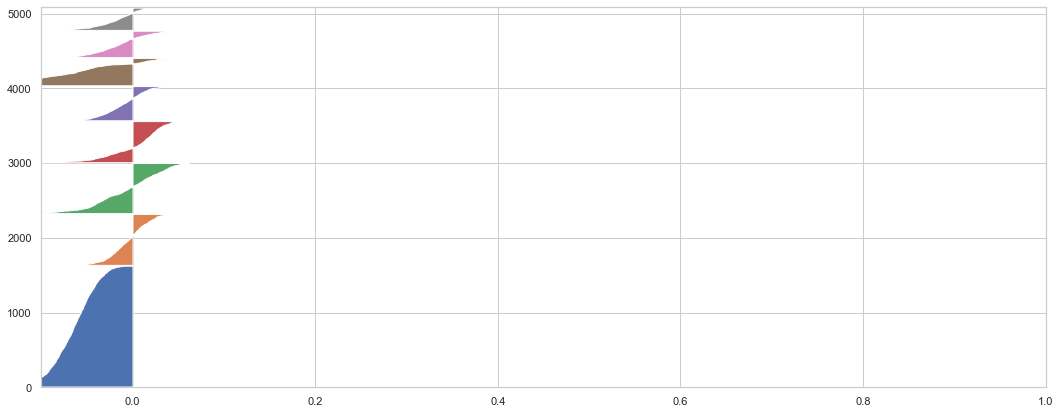

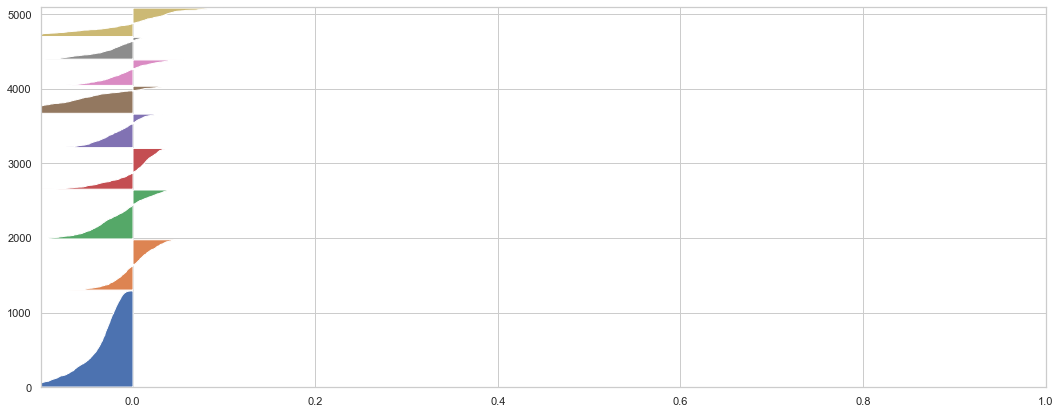

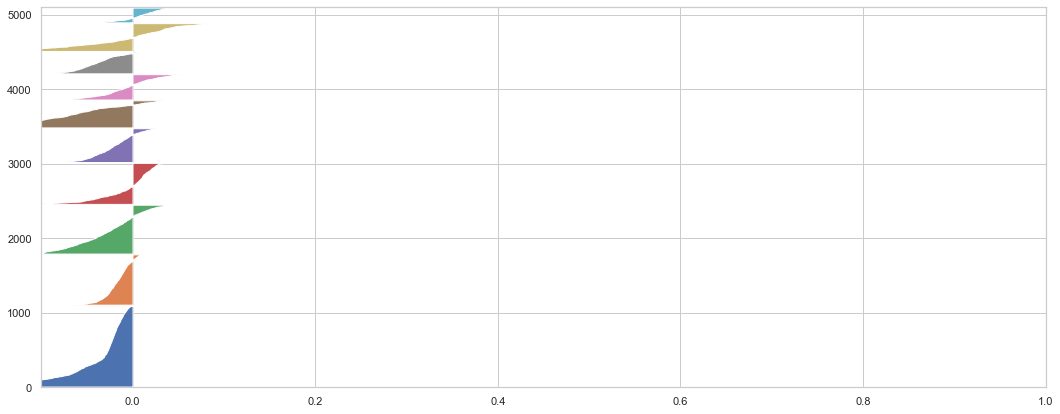

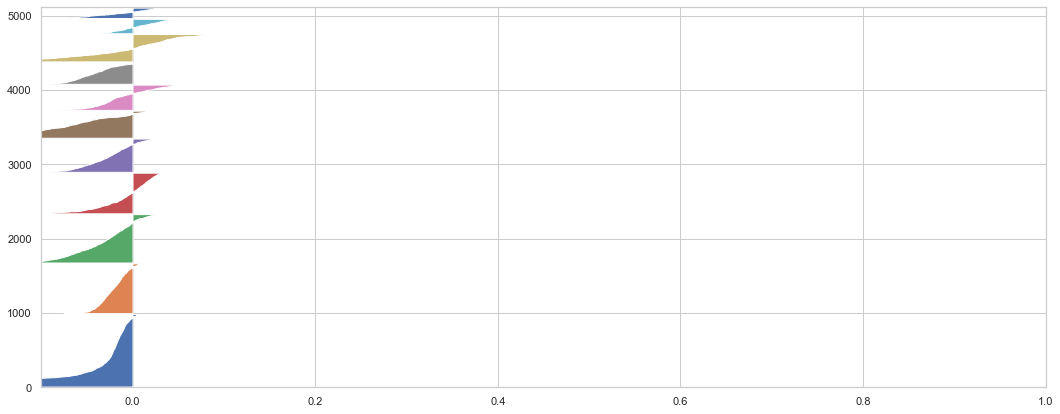

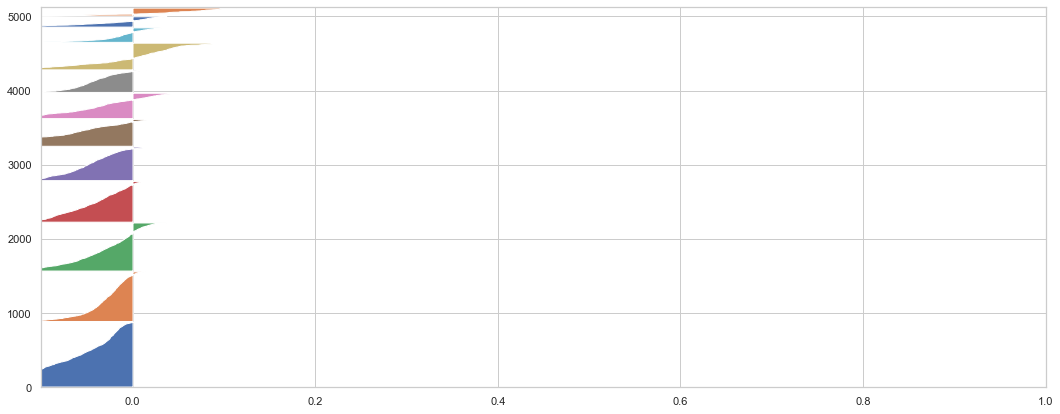

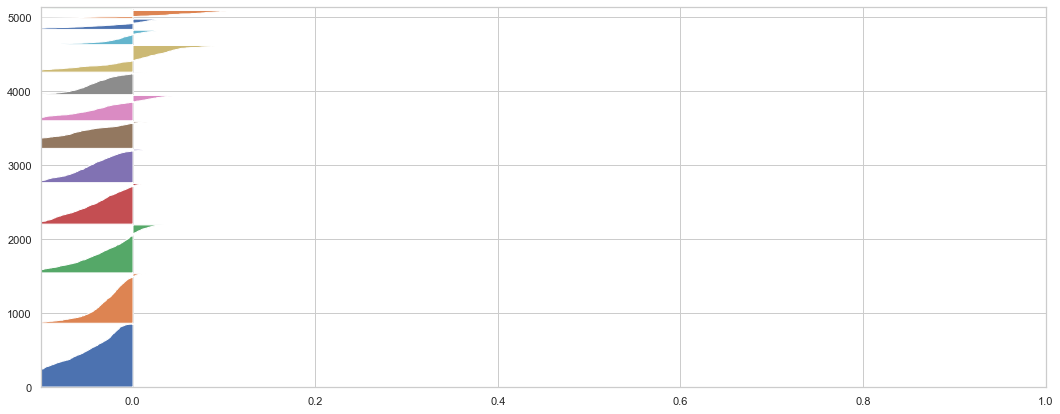

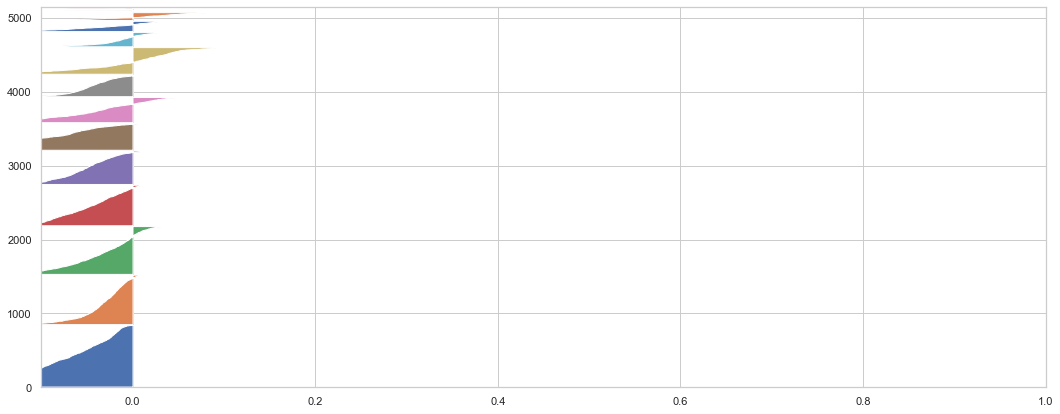

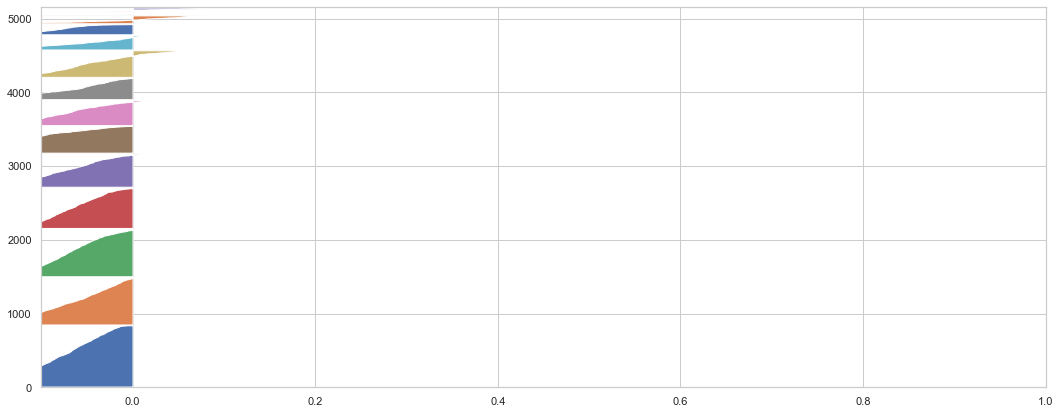

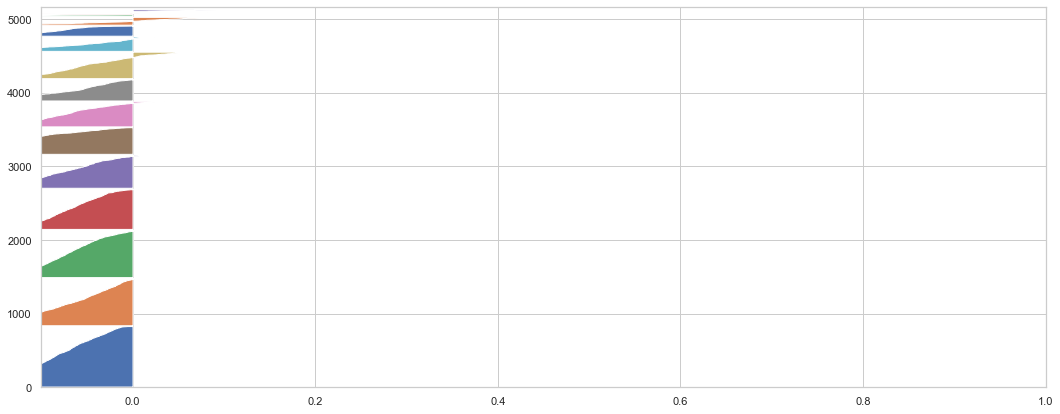

In [46]:
kmodes_silhouette_scores = []
clusters = 16
for cluster in range(2, clusters+1):
    km = KModes(n_clusters = cluster, random_state = 1)
    y = km.fit_predict(data1_temp)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(data1_temp) + (cluster + 1) * 10])
    
    score = silhouette_score(data1_temp, y)
    kmodes_silhouette_scores.append(score)
    print('score :',score)

    sil_sample = silhouette_samples(data1_temp, y)
    y_lower = 10
    for i in range(cluster):
        i_sil_sample = sil_sample[y==i]
        i_sil_sample.sort()
        y_upper = y_lower + i_sil_sample.shape[0]
        ax1.fill_betweenx(np.arange(y_lower,y_upper),0,i_sil_sample)
        y_lower = y_upper + 10

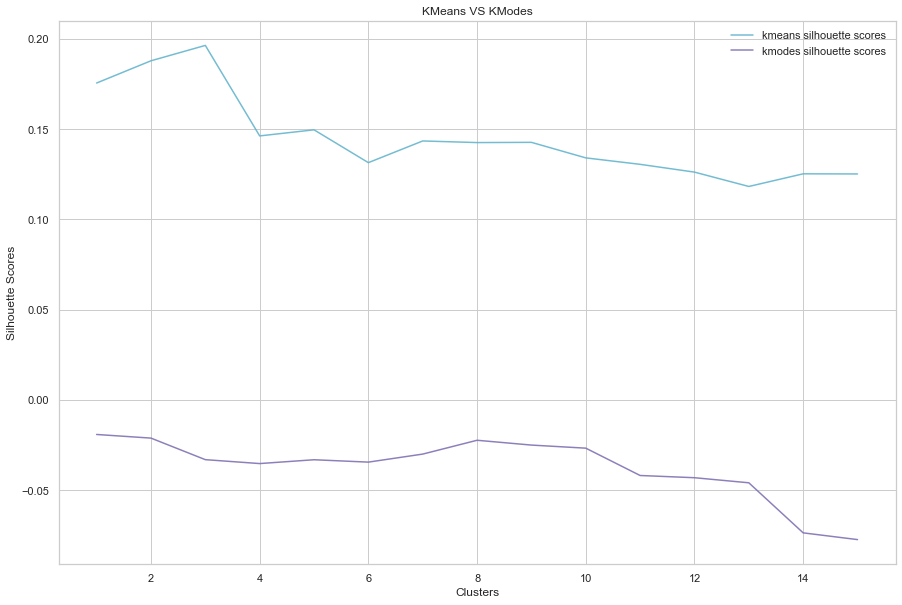

In [47]:
plt.figure(figsize = (15,10))
plt.title('KMeans VS KModes')
plt.xlabel('Clusters')
plt.ylabel('Silhouette Scores')
plt.plot(range(1,len(kmeans_silhouette_scores) + 1), kmeans_silhouette_scores, label = 'kmeans silhouette scores', alpha = 0.9, color = 'c')
plt.plot(range(1,len(kmodes_silhouette_scores) + 1), kmodes_silhouette_scores, label = 'kmodes silhouette scores', alpha = 0.9, color = 'm')
plt.legend()
plt.show()

## Winner K Means

In [141]:
km = KMeans(n_clusters = 16, random_state = 37) #using kmeans for further clustering

In [142]:
km.fit(data)

KMeans(n_clusters=16, random_state=37)

In [50]:
y = km.predict(data)

In [51]:
data['Y'] = y

In [52]:
data['Y'].value_counts()

3     16742
2     16588
11    16042
0     15390
9     15016
5     12924
1     12571
15    12567
4     11441
10    11284
7      9198
12     8984
14     8419
6      4417
8      2572
13      234
Name: Y, dtype: int64

In [53]:
data4 = data.copy() #checkpoint

In [54]:
data

0         1         2         3         4         5         6  \
0       1.294358  0.347919 -0.434495 -0.948791 -0.270401 -0.588004 -0.058354   
1       0.378411  1.790898 -0.556689  0.125710 -0.270401 -0.510657 -0.058354   
2       1.299622  0.626289 -0.464860 -1.088146 -0.270401 -0.589511 -1.479502   
3      -1.313529  1.097814  1.275491  1.156204 -0.270401  1.804534 -0.911043   
4      -0.537536  0.950107 -0.455446  0.822485  3.698207 -0.588829  1.362794   
...          ...       ...       ...       ...       ...       ...       ...   
174384 -1.289849  1.450037 -0.574108  1.405576 -0.270401 -0.589385  0.225876   
174385  0.778480 -0.612173 -0.593617 -0.996465 -0.270401 -0.589564 -0.342584   
174386  0.807432  0.762634 -0.098811  0.389751 -0.270401  2.160212 -0.342584   
174387  1.107484 -0.424699  0.075406 -0.890115  3.698207 -0.589564 -1.479502   
174388 -0.684929  0.796720 -0.236531 -0.083323 -0.270401  2.073534  0.510105   

               7         8         9        10        11        12        13  \
0       0.930106 -0.154111 -1.536239 -0.626050 -0.066549  1.089753  0.413903   
1      -0.721489  0.788862 -1.536239 -0.854645 -0.287113 -0.995485  1.608718   
2       1.705763 -0.060991  0.650940 -0.991803  0.374580 -0.641450  0.621861   
3      -0.460536  0.780077  0.650940 -0.397454 -0.346918  0.363273 -1.823729   
4       1.057535  1.004092 -1.536239 -1.083241 -0.158725  0.167564 -0.852753   
...          ...       ...       ...       ...       ...       ...       ...   
174384 -0.183516  1.170478 -1.536239 -1.174679 -0.384776  0.296340 -1.280013   
174385 -0.083788  0.015086  0.650940 -1.174679 -0.382582 -0.736975 -1.121208   
174386 -0.543642 -0.112822 -1.536239 -1.174679 -0.425378 -0.295778  0.716387   
174387 -0.543642 -0.057301  0.650940  1.979941 -0.373254  1.795212 -0.773351   
174388  0.021479 -0.085413  0.650940 -1.174679 -0.438546 -0.158607  0.841162   

              14   Y  
0      -2.120635   4  
1      -2.120635   4  
2      -2.120635  11  
3      -2.120635  12  
4      -2.120635   7  
...          ...  ..  
174384  1.595750   2  
174385  1.632914   0  
174386  1.595750  12  
174387  1.632914   7  
174388  1.595750  12  

[174389 rows x 16 columns]

# Feature Selection

In [55]:
X = data.iloc[:,:15]
Y = data.iloc[:,15]

In [56]:
X.shape, Y.shape

((174389, 15), (174389,))

# Feature Methods -> Filter Methods -> correlation

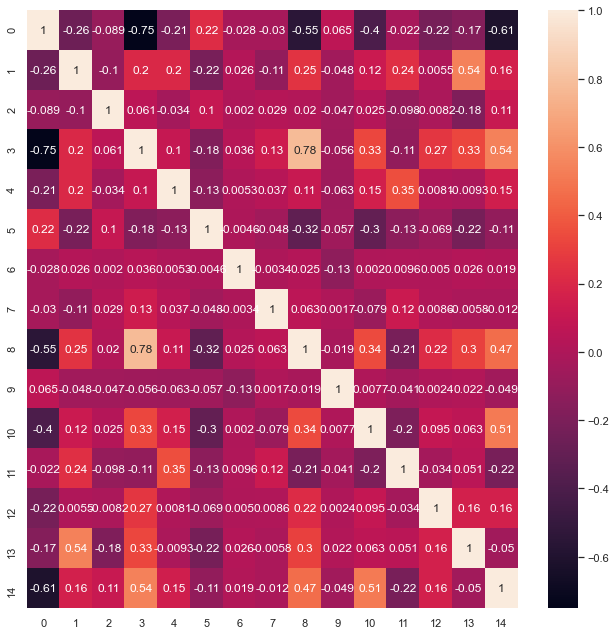

In [57]:
plt.figure(figsize=(11,11))
sns.heatmap(X.corr(), annot = True)

(174389, 13)

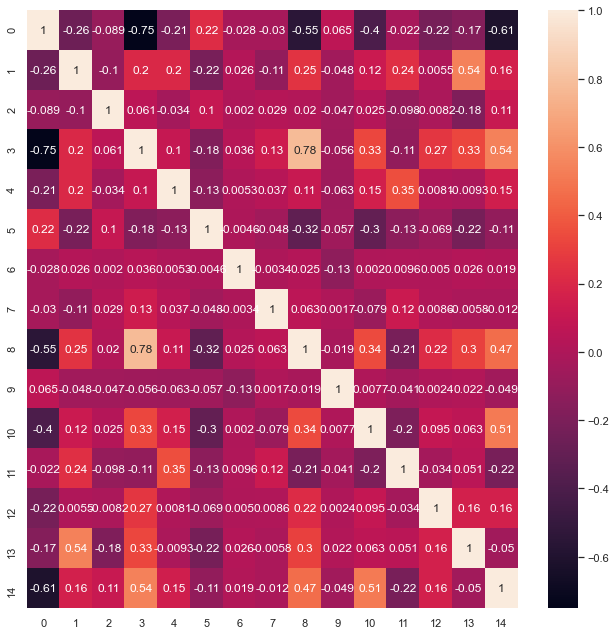

In [58]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = X.corr()

# optional: display a heatmap of the correlation matrix
for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X.drop(labels=corr_features, axis=1, inplace=True)

plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True)
X.shape

In [59]:
X.shape

(174389, 13)

In [60]:
# variance = [] 
# for i in range(1,X.shape[1]):
temp_pca = PCA()
temp_pca.fit(X)
var = np.cumsum(temp_pca.explained_variance_ratio_)

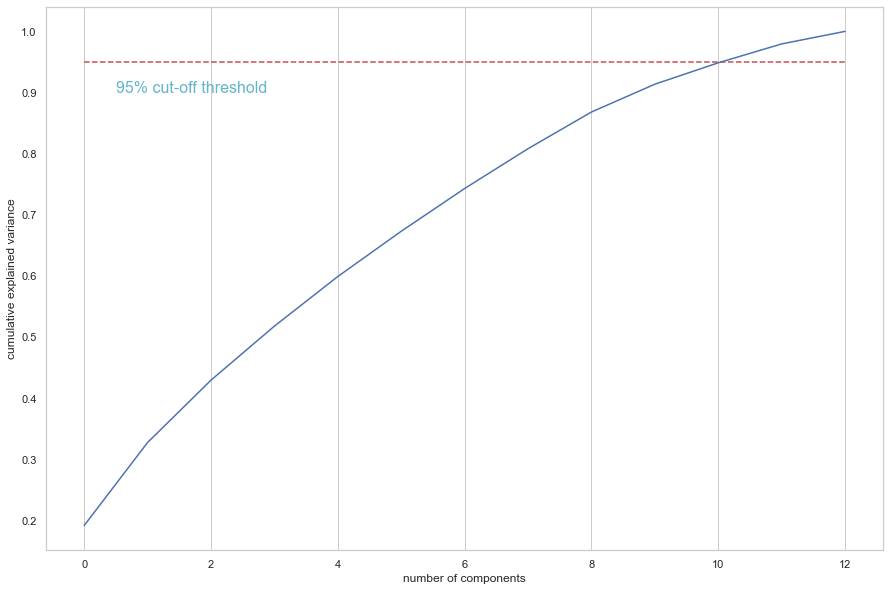

In [61]:
plt.figure(figsize = (15,10))
plt.plot([0.95]*len(var), '--', color = 'r')
plt.plot(var)
plt.grid(axis='x')
plt.text(0.5, 0.90, '95% cut-off threshold', color = 'c', fontsize=16)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [62]:
pca = PCA(n_components = 10, random_state = 15)

In [63]:
pca.fit(X)

PCA(n_components=10, random_state=15)

In [64]:
X = pca.transform(X)

In [65]:
X.shape

(174389, 10)

In [66]:
data = pd.DataFrame(X)

In [67]:
data['Y'] = Y

In [68]:
data

0         1         2         3         4         5         6  \
0       1.233584 -1.593752 -0.310129  0.662062  1.473937 -0.150072 -0.268350   
1       0.462937 -2.532381 -1.230008  1.677016 -0.728447  0.244673  0.937833   
2       1.714603 -2.275735 -0.472728 -1.667321  0.642417  0.123572  1.221305   
3       1.172268  0.599658  0.313295 -0.099459 -0.346326  2.208619  0.174673   
4      -0.188171 -2.075072  2.762737  1.012271  0.304741 -0.702606 -0.868802   
...          ...       ...       ...       ...       ...       ...       ...   
174384 -1.278666  0.396663  0.563797  1.256769  0.039255  0.182518 -0.348091   
174385  0.720840  0.771778  0.078691 -0.893563 -0.611540 -0.650341 -0.163055   
174386  0.484020  0.233878 -0.243752  1.968409 -0.389249  1.642323 -0.033292   
174387 -2.005958  0.978605  1.266001 -2.120089 -1.073828  0.604641 -2.375308   
174388 -0.273065  0.290819 -0.569476  0.954366  0.266602  1.075175  0.236921   

               7         8         9   Y  
0      -1.087110  1.445667  0.919707   4  
1      -1.098500  0.794157  0.363756   4  
2      -0.879176  0.241832  0.539515  11  
3       0.862547 -0.314949 -0.433028  12  
4      -0.026166  0.181240  1.841067   7  
...          ...       ...       ...  ..  
174384 -1.005247 -0.178700 -1.795767   2  
174385 -0.213062 -0.435960 -0.998630   0  
174386 -1.261329 -1.426966  0.071803  12  
174387  0.289614  0.628159  2.844072   7  
174388  0.382578 -2.677518 -0.507657  12  

[174389 rows x 11 columns]

In [69]:
data5 = data.copy()

# Split

In [70]:
data6 = data.sample(20000)

In [71]:
X = data6.iloc[:,0:10]
Y = data6.iloc[:,10]

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 7, test_size = 0.2)

In [73]:
X_train.shape, Y_train.shape

((16000, 10), (16000,))

In [74]:
X_test.shape, Y_test.shape

((4000, 10), (4000,))

In [75]:
check_Y_test = Y_test

In [76]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

# Linear Regression

In [77]:
LR = LinearRegression()

In [78]:
LR.fit(X_train, Y_train)

LinearRegression()

In [79]:
y1_pred = LR.predict(X_test)
y1_pred

array([5.33524683, 2.12938945, 9.58511145, ..., 1.83689955, 7.14033279,
       9.2558392 ])

In [80]:
MMS = MinMaxScaler(feature_range=(0, 15))

In [81]:
y1_pred = MMS.fit_transform(y1_pred.reshape(-1, 1))
y1_pred

array([[5.03132597],
       [1.94283994],
       [9.12559654],
       ...,
       [1.66105854],
       [6.77032497],
       [8.80837945]])

In [82]:
y1_pred = y1_pred.reshape((1,-1))[0]
y1_pred

array([5.03132597, 1.94283994, 9.12559654, ..., 1.66105854, 6.77032497,
       8.80837945])

In [83]:
y1_pred.shape

(4000,)

In [84]:
y1_pred = np.round(y1_pred, decimals = 0)

In [85]:
y1_pred

array([5., 2., 9., ..., 2., 7., 9.])

In [86]:
print("Classification report of Linear Regression:\n",classification_report(Y_test,y1_pred))

Classification report of Linear Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.13      0.01      0.02       295
           2       0.52      0.22      0.31       384
           3       0.15      0.12      0.13       390
           4       0.08      0.15      0.11       261
           5       0.02      0.05      0.03       282
           6       0.02      0.11      0.03        96
           7       0.06      0.16      0.09       214
           8       0.02      0.12      0.03        58
           9       0.02      0.02      0.02       321
          10       0.37      0.27      0.31       267
          11       0.08      0.02      0.04       361
          12       0.00      0.00      0.00       204
          13       0.00      0.00      0.00        12
          14       0.38      0.03      0.06       177
          15       0.00      0.00      0.00       302

    accuracy                       

# Logistic Regression

In [87]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

In [88]:
hyper_c = [0.1,1,10,100]
scores = {'training' : [], 'testing' : []}
for c in hyper_c:
    temp_LogR = LogisticRegression(C = c, n_jobs = -1)
    temp_LogR.fit(X_train, Y_train)
    scores['training'].append(temp_LogR.score(X_train, Y_train))
    scores['testing'].append(temp_LogR.score(X_test, Y_test))
scores    

{'training': [0.8950625, 0.8998125, 0.9009375, 0.9009375],
 'testing': [0.88625, 0.887, 0.88825, 0.8875]}

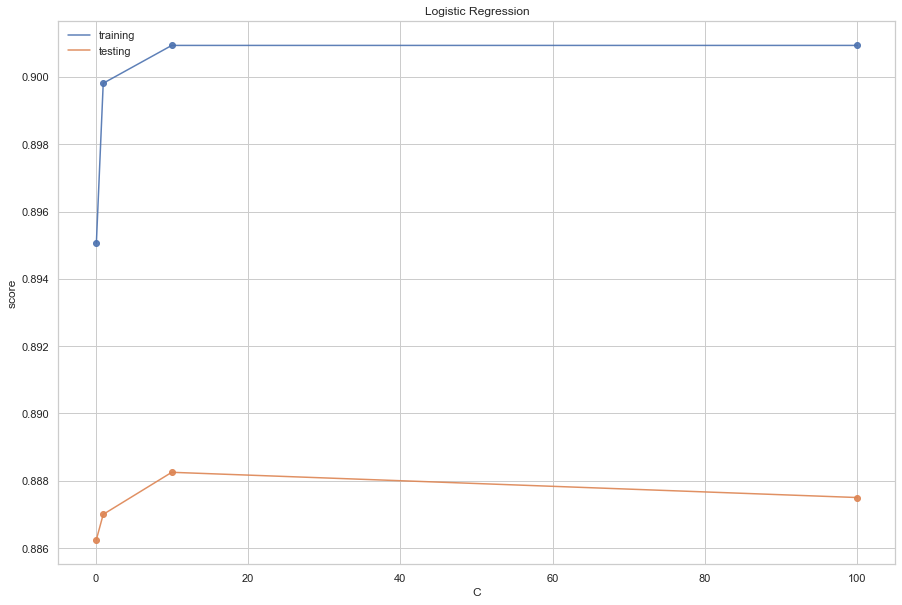

In [89]:
plt.figure(figsize = (15,10))
plt.title('Logistic Regression')
plt.xlabel('C')
plt.ylabel('score')
plt.scatter(hyper_c, scores['training'], alpha = 0.9)
plt.scatter(hyper_c, scores['testing'], alpha = 0.9)
plt.plot(hyper_c, scores['training'], label = 'training', alpha = 0.9)
plt.plot(hyper_c, scores['testing'], label = 'testing', alpha = 0.9)
plt.legend()
plt.show()

In [92]:
LogR = LogisticRegression(C = 10, n_jobs = -1)

In [93]:
LogR.fit(X_train, Y_train)

LogisticRegression(C=10, n_jobs=-1)

In [94]:
y2_pred = LogR.predict(X_test)

In [95]:
print("Classification report of Logistic Regression:\n",classification_report(Y_test,y2_pred))

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77       376
           1       0.85      0.83      0.84       295
           2       0.92      0.96      0.94       384
           3       0.92      0.89      0.91       390
           4       0.92      0.87      0.89       261
           5       0.84      0.87      0.85       282
           6       0.97      0.98      0.97        96
           7       1.00      1.00      1.00       214
           8       0.98      1.00      0.99        58
           9       0.88      0.89      0.89       321
          10       0.91      0.91      0.91       267
          11       0.87      0.90      0.88       361
          12       0.87      0.87      0.87       204
          13       0.89      0.67      0.76        12
          14       0.90      0.94      0.92       177
          15       0.92      0.85      0.89       302

    accuracy                     

# SVM

In [96]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

In [97]:
gammas = [0.1, 1, 10, 100]
scores = {'training' : [], 'testing' : []}
for gamma in gammas:
    SVM_temp = SVC(gamma = gamma, random_state = 11)
    SVM_temp.fit(X_train, Y_train)
    scores['training'].append(temp_LogR.score(X_train, Y_train))
    scores['testing'].append(temp_LogR.score(X_test, Y_test))
scores

{'training': [0.9009375, 0.9009375, 0.9009375, 0.9009375],
 'testing': [0.8875, 0.8875, 0.8875, 0.8875]}

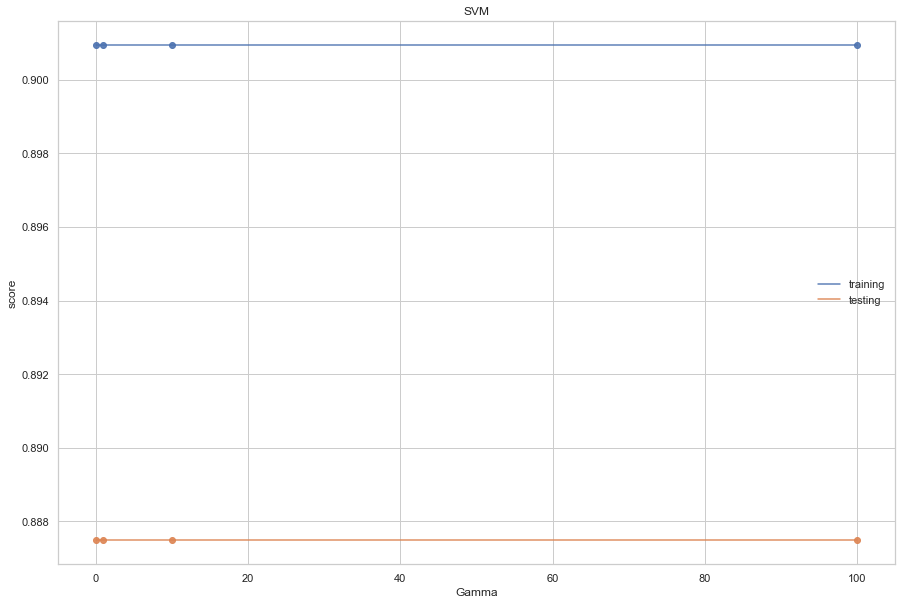

In [98]:
plt.figure(figsize = (15,10))
plt.title('SVM')
plt.xlabel('Gamma')
plt.ylabel('score')
plt.scatter(gammas, scores['training'], alpha = 0.9)
plt.scatter(gammas, scores['testing'], alpha = 0.9)
plt.plot(gammas, scores['training'], label = 'training', alpha = 0.9)
plt.plot(gammas, scores['testing'], label = 'testing', alpha = 0.9)
plt.legend()
plt.show()

In [99]:
SVM = SVC(gamma = 1, random_state = 12)

In [100]:
SVM.fit(X_train, Y_train)

SVC(gamma=1, random_state=12)

In [101]:
y3_pred = SVM.predict(X_test)

In [102]:
print("Classification report of SVM:\n",classification_report(Y_test,y3_pred))

Classification report of SVM:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       376
           1       0.82      0.81      0.81       295
           2       0.91      0.93      0.92       384
           3       0.92      0.88      0.90       390
           4       0.88      0.83      0.86       261
           5       0.83      0.89      0.86       282
           6       1.00      0.80      0.89        96
           7       1.00      0.91      0.95       214
           8       1.00      0.90      0.95        58
           9       0.88      0.90      0.89       321
          10       0.90      0.90      0.90       267
          11       0.89      0.88      0.89       361
          12       0.86      0.84      0.85       204
          13       1.00      0.08      0.15        12
          14       0.56      0.95      0.70       177
          15       0.91      0.80      0.85       302

    accuracy                           0.86      

# Decision tree

In [103]:
Y_test.shape,check_Y_test.shape

((4000,), (4000,))

In [104]:
X = data.iloc[:,0:10]
Y = data.iloc[:,10]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 9, test_size = 0.2)

In [105]:
Y_test.shape,check_Y_test.shape

((34878,), (4000,))

In [106]:
criterions = ["gini", "entropy"]
scores = {"gini" : [], "entropy" : []}
for criterion in criterions:
    score_train = []
    score_test = []
    for depth in range(1,11):
        DT_temp = DecisionTreeClassifier(criterion = criterion, random_state = 13, max_depth = depth)
        DT_temp.fit(X_train, Y_train)
        score_train.append(DT_temp.score(X_train, Y_train))
        score_test.append(DT_temp.score(X_test,Y_test))
    scores[criterion].append([score_train,score_test])

In [107]:
plt.style.use('seaborn-darkgrid')

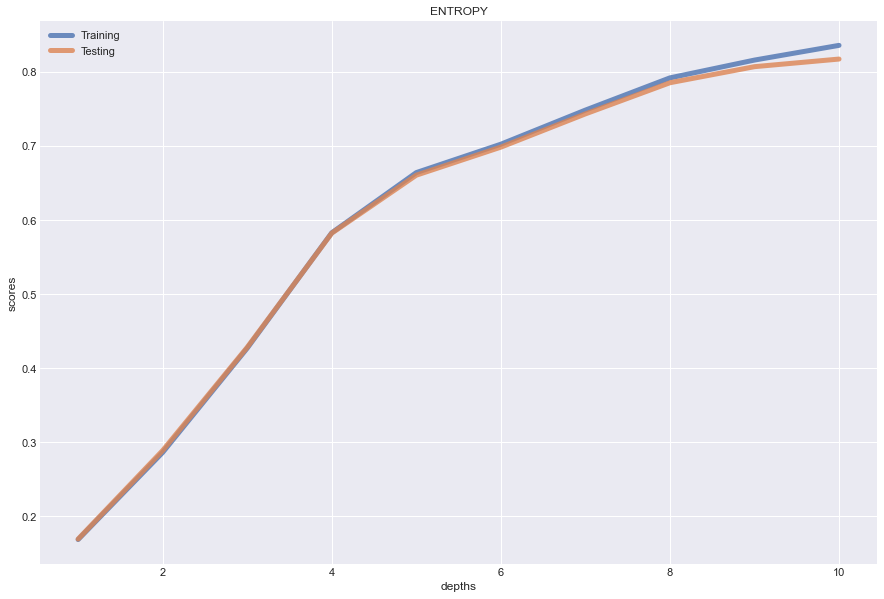

In [108]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("ENTROPY")
plt.plot(range(1,11), scores['entropy'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['entropy'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

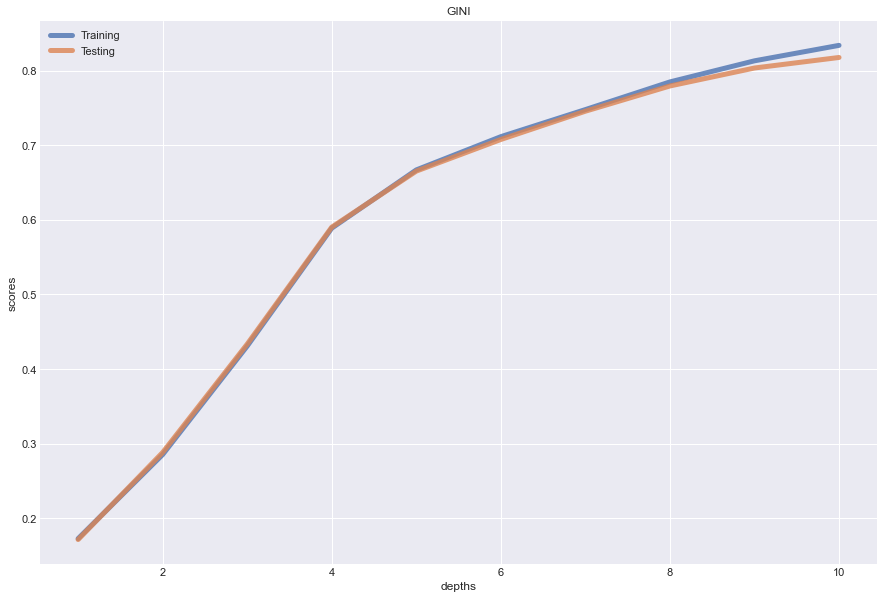

In [109]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("GINI")
plt.plot(range(1,11), scores['gini'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['gini'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

In [110]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 29)

In [111]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=29)

In [112]:
y4_pred = DT.predict(X_test)

In [113]:
print("Train Score :",DT.score(X_train, Y_train))
print("Test Score :",DT.score(X_test, Y_test))

Train Score : 0.8355255141171664
Test Score : 0.8171053386088651


In [114]:
print("Classification report of DT:\n",classification_report(Y_test, y4_pred))

Classification report of DT:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      3147
           1       0.71      0.71      0.71      2477
           2       0.86      0.90      0.88      3290
           3       0.84      0.79      0.81      3331
           4       0.83      0.82      0.83      2195
           5       0.87      0.83      0.85      2619
           6       0.97      0.93      0.95       903
           7       1.00      0.98      0.99      1925
           8       0.99      0.99      0.99       496
           9       0.76      0.83      0.79      3036
          10       0.80      0.86      0.83      2253
          11       0.79      0.86      0.82      3207
          12       0.81      0.80      0.81      1781
          13       0.88      0.96      0.92        46
          14       0.81      0.77      0.79      1658
          15       0.85      0.73      0.79      2514

    accuracy                           0.82     34

In [115]:
plt.style.use('dark_background')

[Text(4079.5089821257197, 5188.909090909091, 'X[0] <= 0.209\nentropy = 3.809\nsamples = 139511\nvalue = [12243, 10094, 13298, 13411, 9246, 10305, 3514, 7273\n2076, 11980, 9031, 12835, 7203, 188, 6761, 10053]\nclass = y[3]'),
 Text(2273.0668186180424, 4694.727272727273, 'X[2] <= 0.832\nentropy = 3.281\nsamples = 80132\nvalue = [7531, 9504, 13213, 13292, 2264, 32, 527, 7257, 1978\n11746, 236, 2740, 5645, 42, 4119, 6]\nclass = y[3]'),
 Text(1319.4430782149711, 4200.545454545454, 'X[3] <= -0.117\nentropy = 2.942\nsamples = 64922\nvalue = [7358, 8968, 12087, 13269, 2186, 16, 39, 129, 0\n11732, 236, 2740, 4037, 0, 2122, 3]\nclass = y[3]'),
 Text(646.7940259117082, 3706.363636363636, 'X[4] <= 0.695\nentropy = 2.441\nsamples = 30188\nvalue = [5392, 6436, 175, 2540, 46, 2, 33, 101, 0, 11391\n19, 1439, 690, 0, 1922, 2]\nclass = y[9]'),
 Text(308.58685220729365, 3212.181818181818, 'X[1] <= 0.435\nentropy = 2.177\nsamples = 22839\nvalue = [5217, 3113, 130, 2059, 31, 2, 22, 100, 0, 10474\n16, 1081,

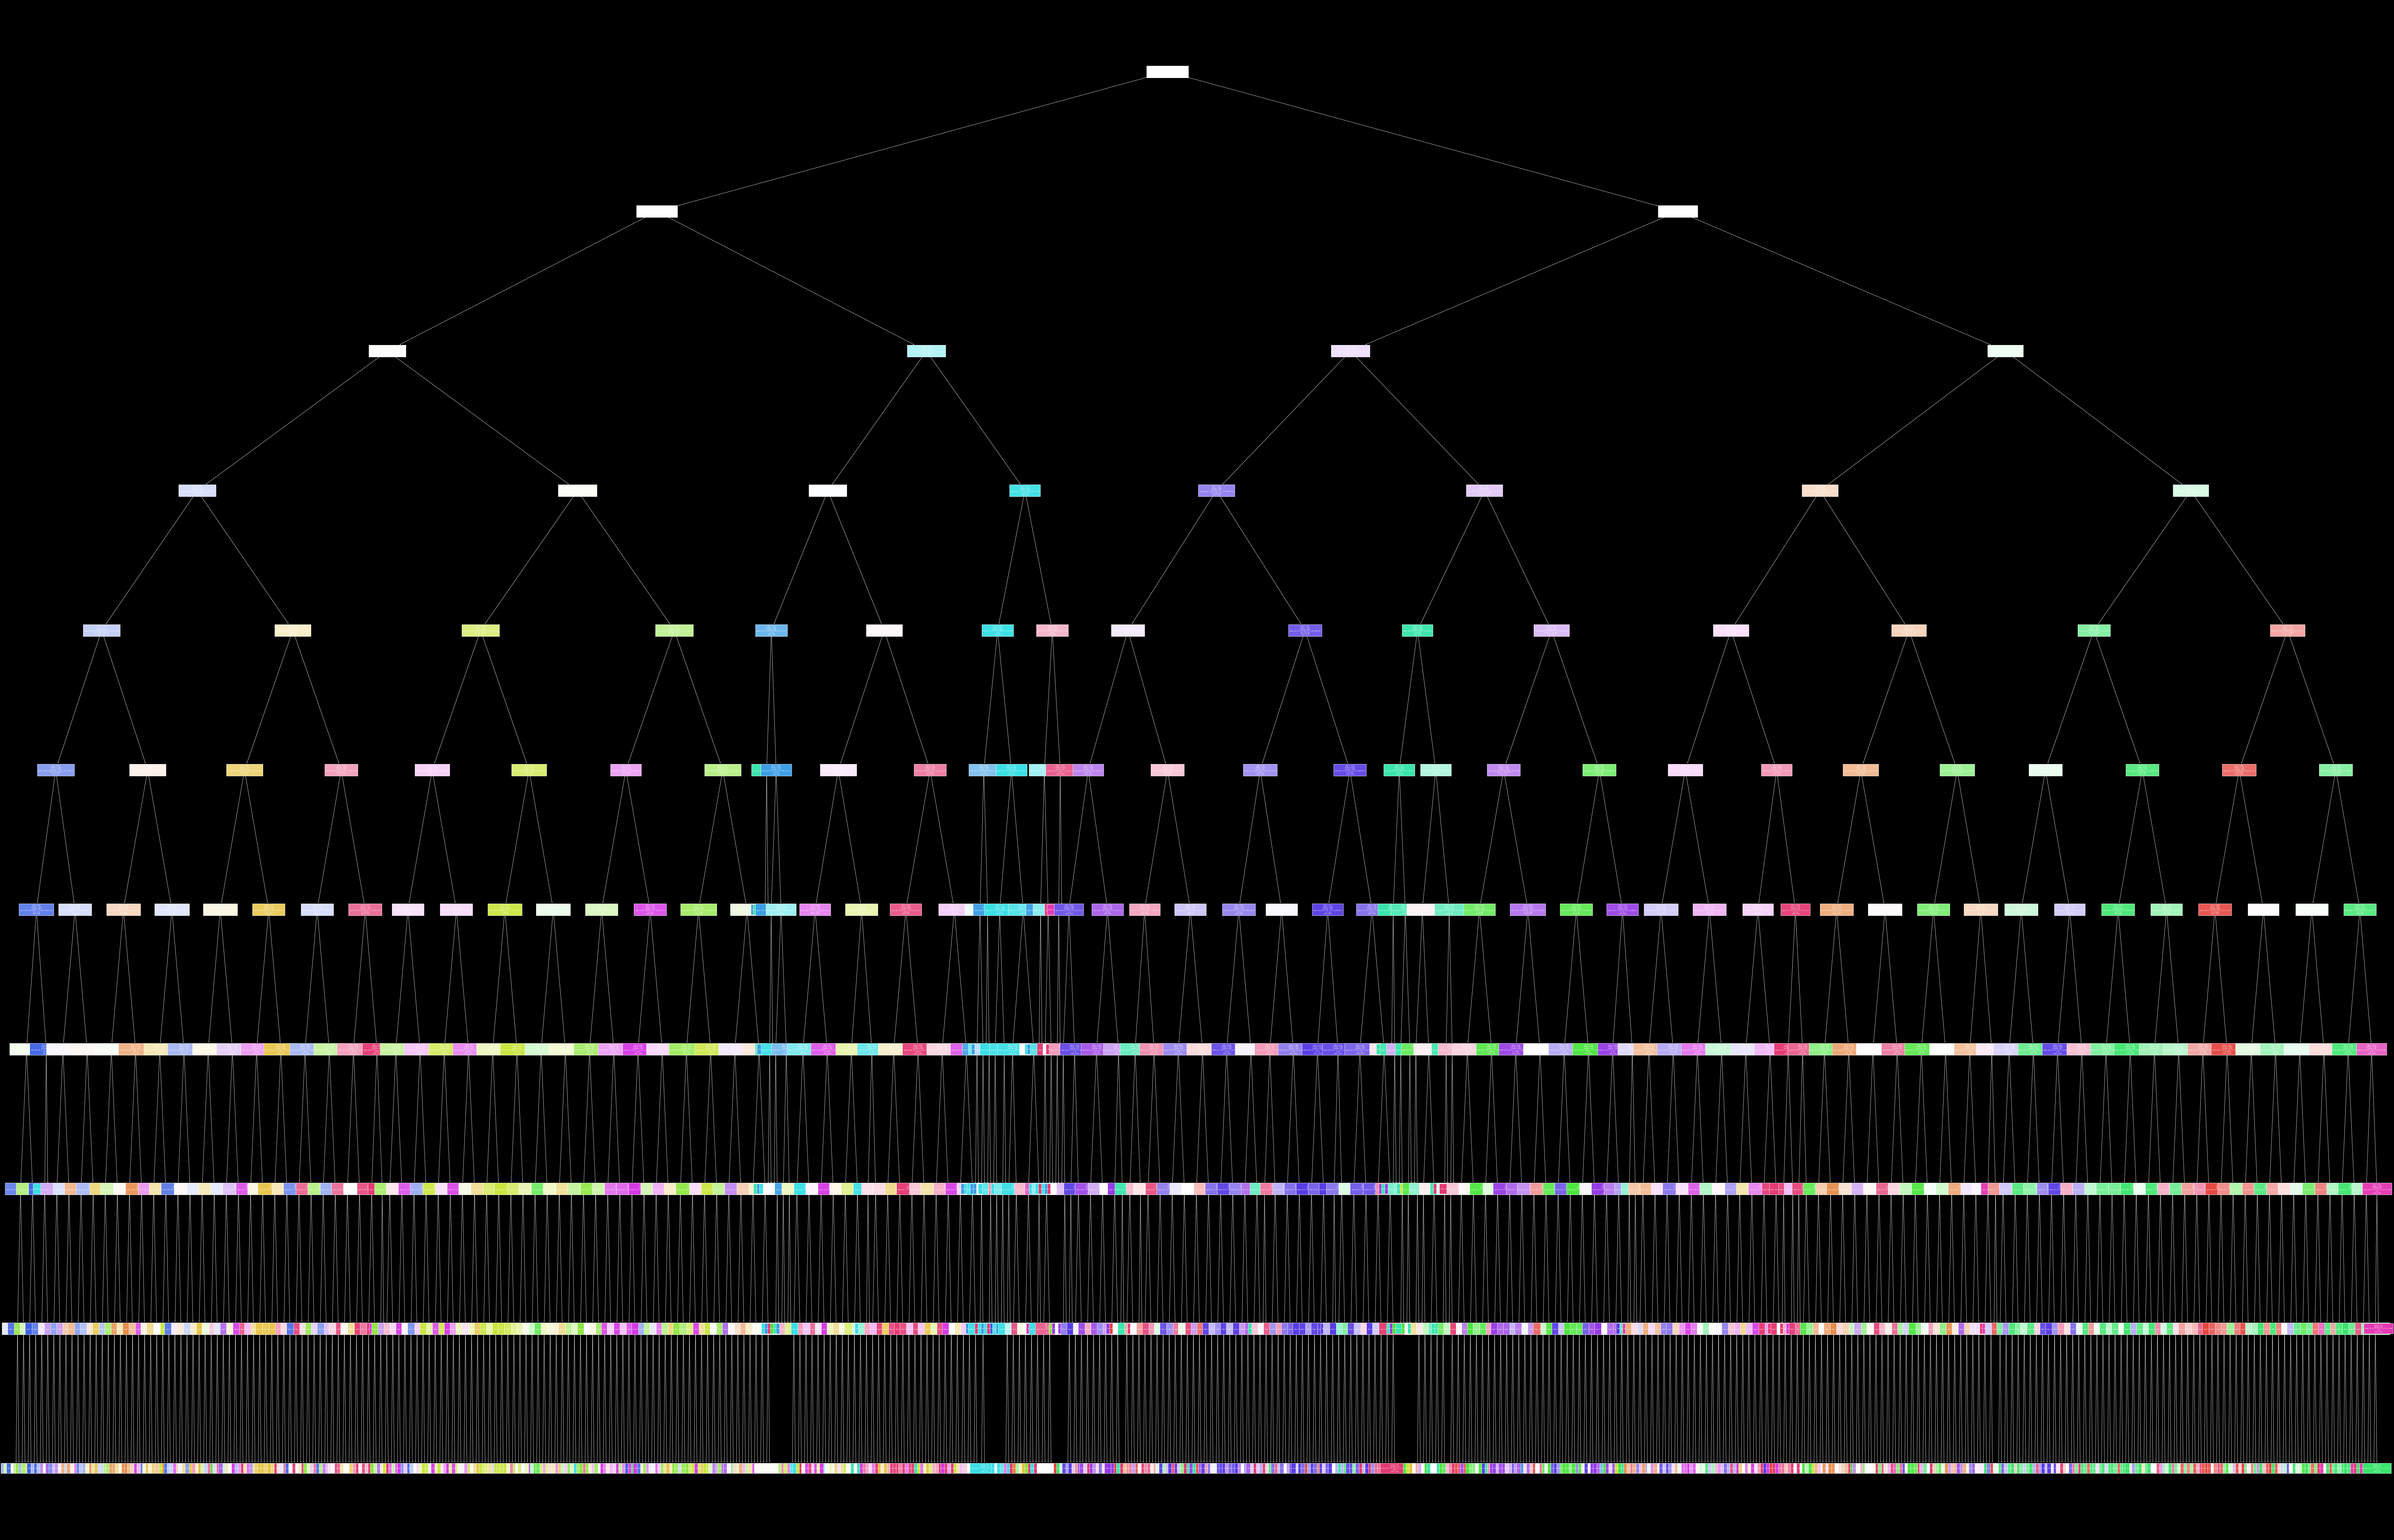

In [116]:
plt.figure(figsize = (150,100))
plt.style.use('dark_background')
plot_tree(DT,class_names=True, filled = True, fontsize = 5)

# RF

In [117]:
Y_test.shape,check_Y_test.shape

((34878,), (4000,))

In [118]:
criterions = ["gini", "entropy"]
scores = {"gini" : [], "entropy" : []}
for criterion in criterions:
    score_train = []
    score_test = []
    for depth in range(1,11):
        RF_temp = RandomForestClassifier(criterion = criterion, random_state = 17, max_depth = depth, n_jobs = -1)
        RF_temp.fit(X_train, Y_train)
        score_train.append(RF_temp.score(X_train, Y_train))
        score_test.append(RF_temp.score(X_test,Y_test))
    scores[criterion].append([score_train,score_test])

In [119]:
plt.style.use('seaborn-darkgrid')

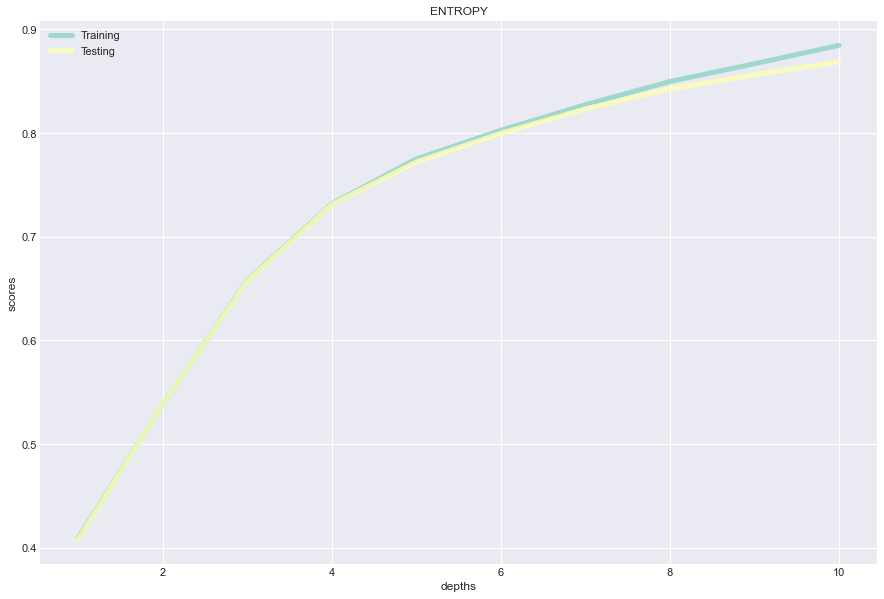

In [120]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("ENTROPY")
plt.plot(range(1,11), scores['entropy'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['entropy'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

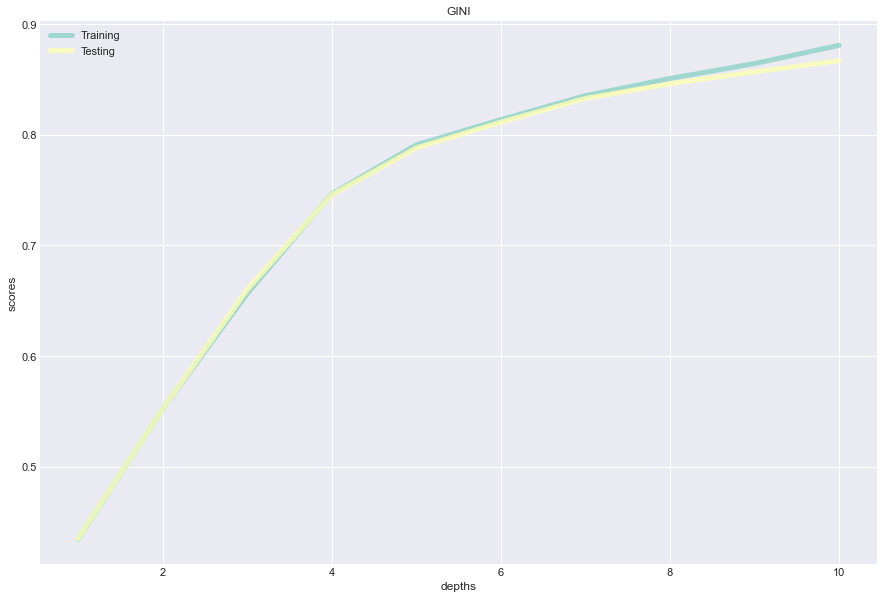

In [121]:
plt.figure(figsize = (15,10))
plt.xlabel("depths")
plt.ylabel("scores")
plt.title("GINI")
plt.plot(range(1,11), scores['gini'][0][0],alpha = 0.8,label = "Training", linewidth = 5)
plt.plot(range(1,11), scores['gini'][0][1],alpha = 0.8,label = "Testing", linewidth = 5)
plt.legend()
plt.show()

In [122]:
RF = RandomForestClassifier(criterion = 'entropy', random_state = 40, max_depth = 10, n_jobs = -1)

In [123]:
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=40)

In [124]:
y5_pred = RF.predict(X_test)

In [125]:
print("Classification report of RF:\n",classification_report(Y_test, y5_pred))

Classification report of RF:
               precision    recall  f1-score   support

           0       0.75      0.68      0.71      3147
           1       0.85      0.76      0.80      2477
           2       0.87      0.95      0.91      3290
           3       0.85      0.91      0.88      3331
           4       0.87      0.87      0.87      2195
           5       0.86      0.88      0.87      2619
           6       0.98      0.96      0.97       903
           7       1.00      1.00      1.00      1925
           8       1.00      1.00      1.00       496
           9       0.85      0.89      0.87      3036
          10       0.86      0.88      0.87      2253
          11       0.86      0.87      0.86      3207
          12       0.87      0.88      0.88      1781
          13       1.00      1.00      1.00        46
          14       0.92      0.90      0.91      1658
          15       0.88      0.81      0.84      2514

    accuracy                           0.87     34

In [126]:
plt.style.use('dark_background')

[Text(4473.540230573577, 4151.127272727273, '2 <= 0.128\nentropy = 3.807\nsamples = 88295\nvalue = [12242, 10025, 13402, 13526, 9394, 10379, 3506, 7310\n2037, 11942, 8853, 12788, 7207, 196, 6576, 10128]'),
 Text(2441.185721394869, 3755.7818181818184, '0 <= -0.064\nentropy = 3.353\nsamples = 55198\nvalue = [9682, 7218, 8247, 13007, 5575, 2211, 48, 1, 0, 11665\n7852, 12609, 2273, 0, 1062, 5747]'),
 Text(1234.689158802713, 3360.4363636363637, '8 <= 0.162\nentropy = 2.701\nsamples = 30464\nvalue = [4545, 6515, 8143, 12620, 1080, 1, 9, 1, 0, 11063\n73, 1578, 1717, 0, 651, 4]'),
 Text(614.6063108227662, 2965.090909090909, '3 <= -0.214\nentropy = 2.401\nsamples = 17689\nvalue = [2031, 2144, 1461, 11323, 55, 1, 6, 1, 0, 7425, 73\n937, 1713, 0, 618, 4]'),
 Text(315.94219994102036, 2569.745454545455, '2 <= -0.934\nentropy = 1.977\nsamples = 7740\nvalue = [1153, 1341, 2, 1492, 0, 1, 6, 1, 0, 6965, 1, 340\n224, 0, 575, 0]'),
 Text(157.97109997051018, 2174.4, '5 <= 0.09\nentropy = 1.073\nsamples = 

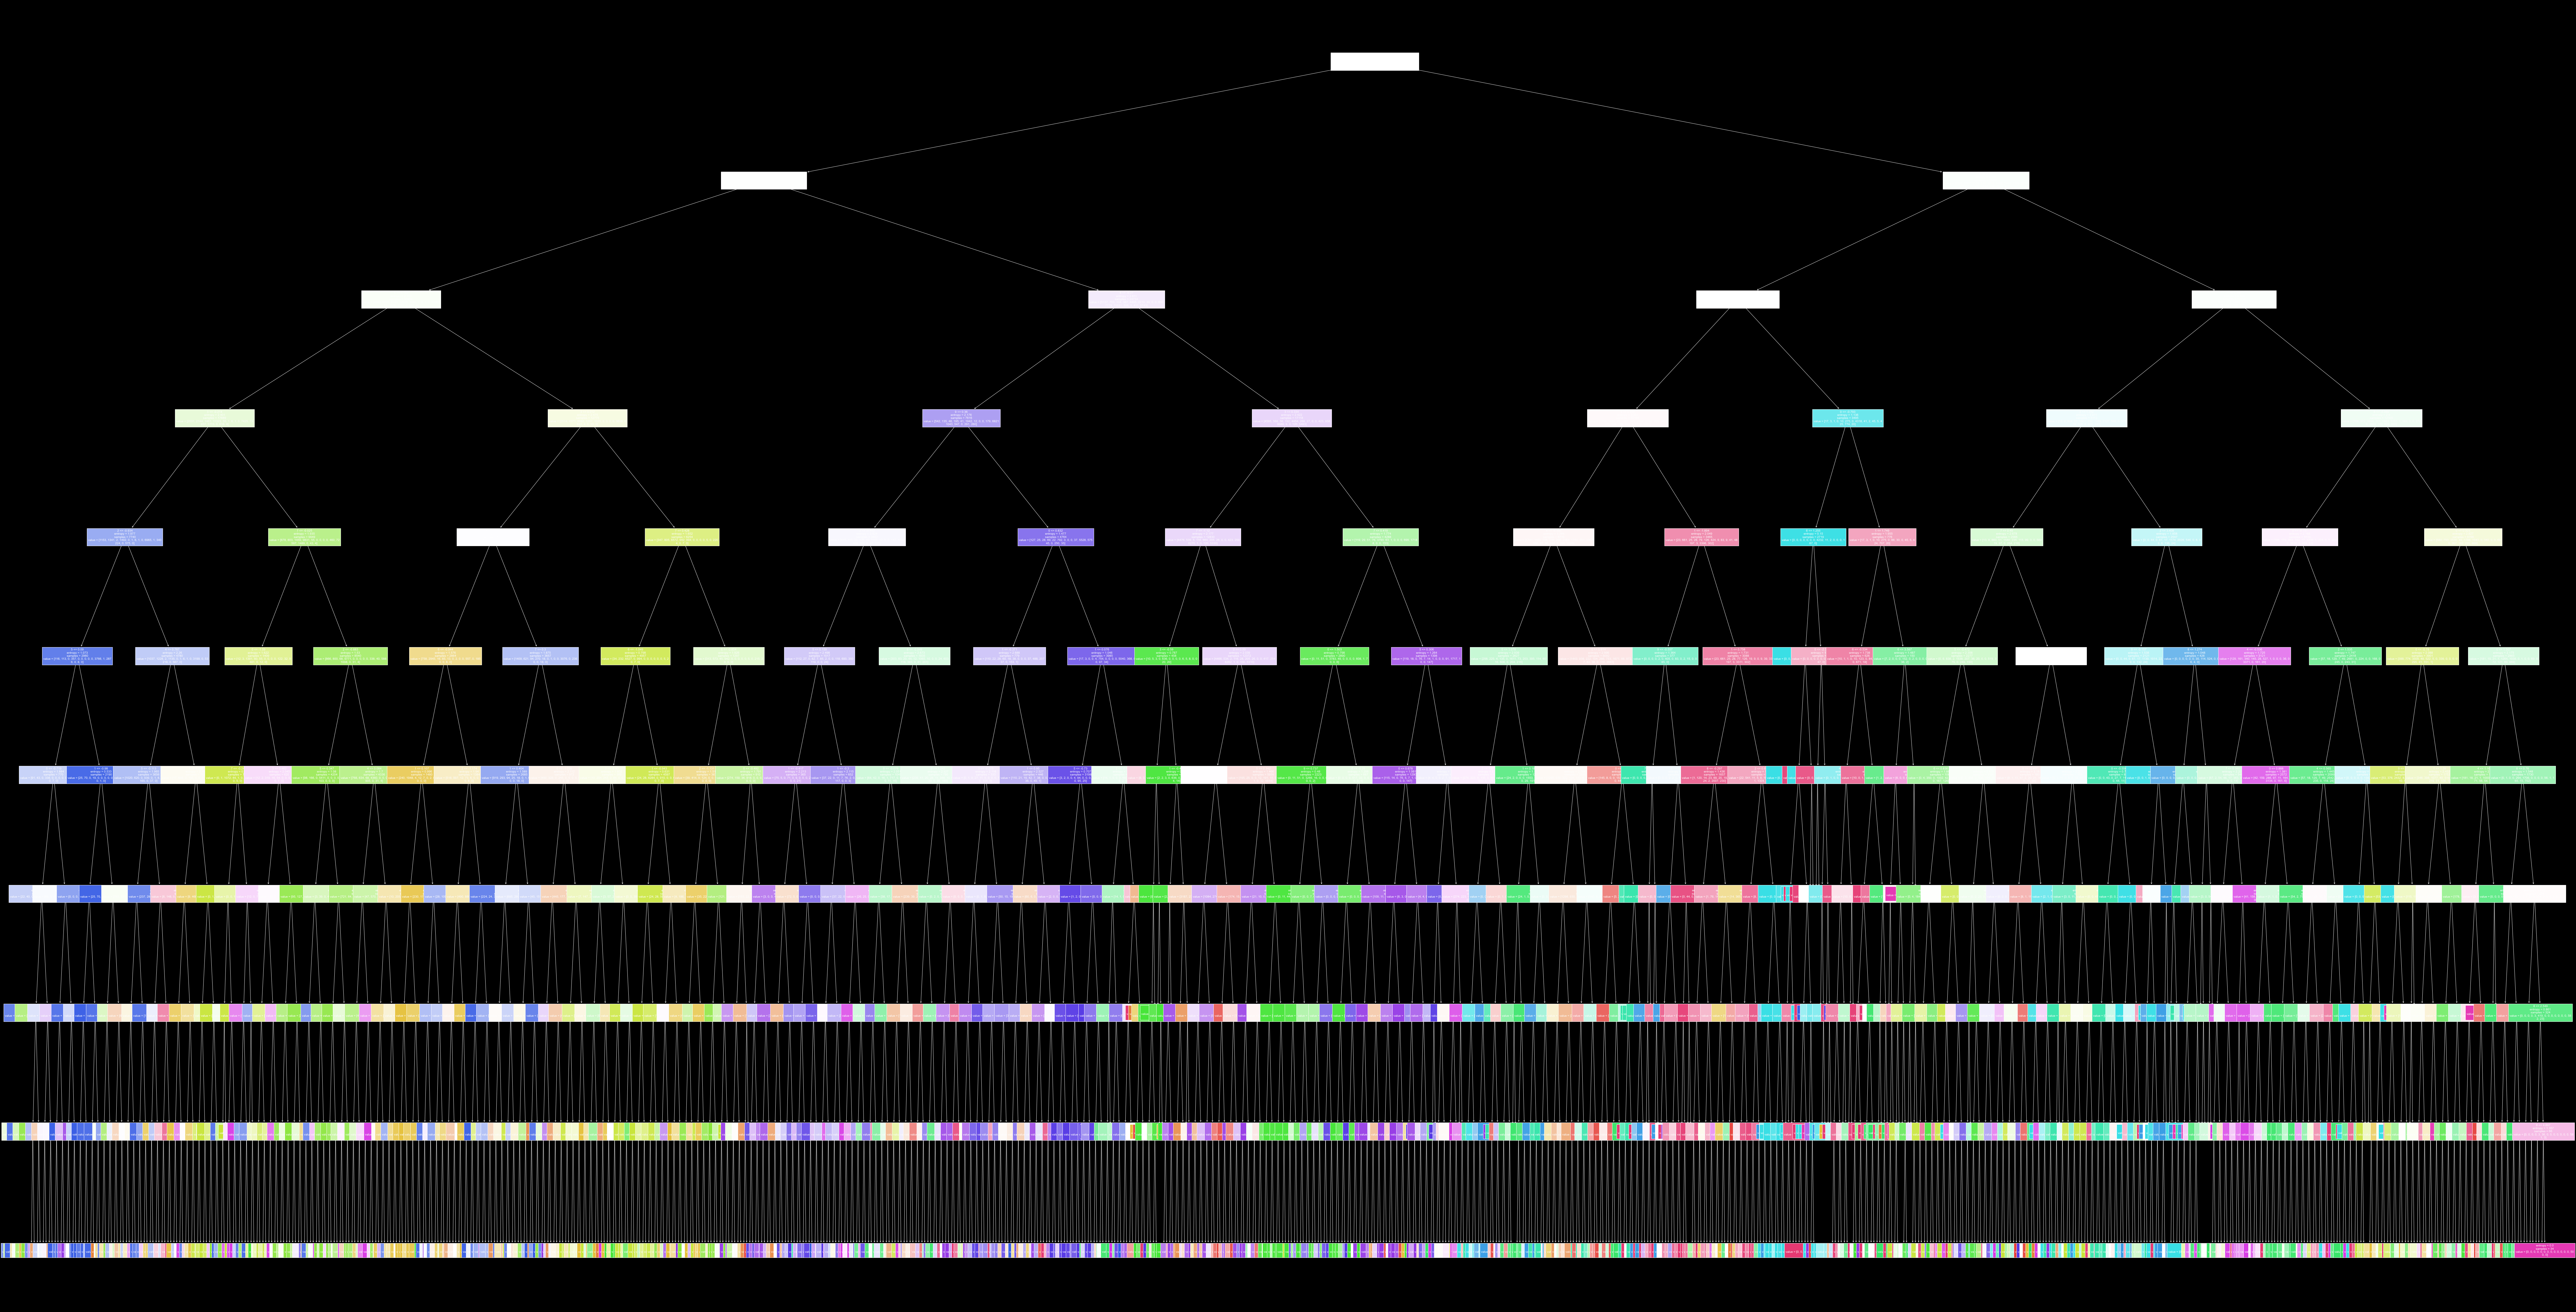

In [127]:
#estimators_[0] is by default the best tree in randomForestClassifier
plt.style.use('dark_background')
plt.subplots(figsize=(150,80))
plot_tree(RF.estimators_[0], feature_names=X_train.columns, filled=True, fontsize = 10)

In [128]:
check_Y_test.shape,Y_test.shape

((4000,), (34878,))

In [129]:
print("Classification report of Linear Regression:\n",classification_report(check_Y_test,y1_pred))
print('-' * 60)
print()
print("Classification report of Logistic Regression:\n",classification_report(check_Y_test,y2_pred))
print('-' * 60)
print()
print("Classification report of SVM:\n",classification_report(check_Y_test,y3_pred))
print('-' * 60)
print()
print("Classification report of DT:\n",classification_report(Y_test, y4_pred))
print('-' * 60)
print()
print("Classification report of RF:\n",classification_report(Y_test, y5_pred))

Classification report of Linear Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       376
           1       0.13      0.01      0.02       295
           2       0.52      0.22      0.31       384
           3       0.15      0.12      0.13       390
           4       0.08      0.15      0.11       261
           5       0.02      0.05      0.03       282
           6       0.02      0.11      0.03        96
           7       0.06      0.16      0.09       214
           8       0.02      0.12      0.03        58
           9       0.02      0.02      0.02       321
          10       0.37      0.27      0.31       267
          11       0.08      0.02      0.04       361
          12       0.00      0.00      0.00       204
          13       0.00      0.00      0.00        12
          14       0.38      0.03      0.06       177
          15       0.00      0.00      0.00       302

    accuracy                       

In [130]:
plt.style.use('dark_background')

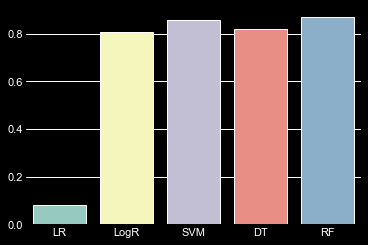

In [143]:
sns.barplot(x=['LR','LogR','SVM','DT','RF'], y = [0.08,0.809,0.86,0.82,0.87])

In [133]:
data1

acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1fUEUd1EW3FcF8AEI   
1            150200   0.517         0  0hbkKFIJm7Z05H8Zl9w30f   
2            163827   0.186         0  11m7laMUgmOKqI3oYzuhne   
3            422087   0.798         0  19Lc5SfJJ5O1oaxY0fpwfh   
4            165224   0.707         1  2hJjbsLCytGsnAHfdsLejp   
...             ...     ...       ...                     ...   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
0               0.000522    5    0.3790   -12.628     0   
1               0.026400    5    0.0809    -7.261     0   
2               0.000018    0    0.5190   -12.098     1   
3               0.801000    2    0.1280    -7.311     1   
4               0.000246   10    0.4020    -6.036     0   
...                  ...  ...       ...       ...   ...   
174384          0.000060    6    0.1780    -5.089     0   
174385          0.000000    4    0.1960   -11.665     1   
174386          0.920000    4    0.1130   -12.393     0   
174387          0.000000    0    0.1130   -12.077     1   
174388          0.891000    7    0.2150   -12.237     1   

                                                     name  popularity  \
0                                Keep A Song In Your Soul          12   
1                                    I Put A Spell On You           7   
2                                            Golfing Papa           4   
3       True House Music - Xavier Santos & Carlos Gomi...          17   
4                                               Xuniverxe           2   
...                                                   ...         ...   
174384                                            The One           0   
174385                                      A Little More           0   
174386                                           Together           0   
174387                                 champagne problems          69   
174388                                     Improvisations           0   

       release_date  speechiness    tempo  valence  year  
0              1920       0.0936  149.976   0.6340  1920  
1        1920-01-05       0.0534   86.889   0.9500  1920  
2              1920       0.1740   97.600   0.6890  1920  
3        1920-01-01       0.0425  127.997   0.0422  1920  
4        1920-10-01       0.0768  122.076   0.2990  1920  
...             ...          ...      ...      ...   ...  
174384   2020-12-25       0.0356  125.972   0.1860  2020  
174385   2021-01-22       0.0360   94.710   0.2280  2021  
174386   2020-12-09       0.0282  108.058   0.7140  2020  
174387   2021-01-07       0.0377  171.319   0.3200  2021  
174388   2020-12-09       0.0258  112.208   0.7470  2020  

[174389 rows x 19 columns]

In [147]:
def recommendation(spotify_link, suggestion_length, data1, data5):
    spotify_id = spotify_link.split(':')[2]
    # print(spotify_id)
    spotify_index = data1[data1.id == spotify_id].index[0]
    # print(spotify_index)
    spotify_cluster_num = data5.iloc[spotify_index].Y
    spotify_recommendation_index_list = data5[data5.Y == spotify_cluster_num].sample(suggestion_length).index.to_list()
    return data1.iloc[spotify_recommendation_index_list, [12, 1, 14, 5]]

In [148]:
def recommendation1(spotify_link, suggestion_length, data1, data5):
    spotify_id = spotify_link.split(':')[2]
    # print(spotify_id)
    spotify_index = data1[data1.id == spotify_id].index[0]
    # print(spotify_index)
    spotify_cluster_num = data5.iloc[spotify_index].Y
    spotify_recommendation_index_list = data5[data5.Y == spotify_cluster_num].sample(suggestion_length).index.to_list()
    return data1.iloc[spotify_recommendation_index_list]

In [149]:
# spotify:track:7tue2Wemjd0FZzRtDrQFZd
spotify_link = input("Enter Which song were you listening : ")

Enter Which song were you listening : spotify:track:7tue2Wemjd0FZzRtDrQFZd


In [150]:
recommendation(spotify_link,int(input("Enter the number of recommendations : ")), data1, data5)

Enter the number of recommendations : 10


name  \
88521            Sweet Sweet - Remastered   
57309               She - Remastered 2015   
99791   Gomper - Remastered 2017 / Stereo   
45685      I Didn't Know What Time It Was   
27559                     Trinkle, Tinkle   
30905                  Sweet Is the Night   
72604                               Kid A   
33053                     Hands To Heaven   
29421                     La Mano de Dios   
150120                               Free   

                                                artists release_date  explicit  
88521                         ['The Smashing Pumpkins']         1993         0  
57309   ['Roy Orbison', 'Alex Orbison', 'Chuck Turner']   2015-10-23         0  
99791                            ['The Rolling Stones']   1967-12-08         0  
45685                   ['Stan Getz', 'Gerry Mulligan']   1957-11-01         0  
27559              ['Thelonious Monk', 'John Coltrane']         1961         0  
30905                      ['Electric Light Orchestra']         1977         0  
72604                                     ['Radiohead']   2000-10-02         0  
33053                                       ['Breathe']   1988-01-01         0  
29421                          ['José Alfredo Jimenez']   1970-07-26         0  
150120                             ['Deniece Williams']   1976-08-01         0

In [151]:
recommendation1(spotify_link,int(input("Enter the number of recommendations : ")), data1, data5)

Enter the number of recommendations : 10


acousticness                 artists  danceability  duration_ms  \
134582         0.520      ['Gerry Rafferty']         0.606       316347   
19123          0.702            ['Kit Chan']         0.372       254520   
133921         0.845        ['Dolly Parton']         0.536       165533   
30523          0.913       ['Willie Nelson']         0.640       138693   
27735          0.817           ['Bob Dylan']         0.377       187400   
30191          0.752       ['Joni Mitchell']         0.506       166160   
152583         0.811       ['Keith Whitley']         0.633       199773   
154244         0.813                ['4Him']         0.487       276307   
87054          0.178  ['Hank Williams, Jr.']         0.559       341893   
124230         0.418              ['ลิเดีย']         0.539       236973   

        energy  explicit                      id  instrumentalness  key  \
134582  0.4360         0  0WmJhww5BZROmkmAaOZUXj          0.002410    4   
19123   0.3280         0  1vo8399T9sWFZ9vbrEcTL5          0.000000   10   
133921  0.2740         0  3ok23D9fjWA1QR4geSr4kr          0.000089    0   
30523   0.1330         0  1DoRzygjRH9VbBdxeh8yAb          0.050900    4   
27735   0.3970         0  3SF5puV5eb6bgRSxBeMOk9          0.049600    7   
30191   0.1270         0  2l8kERLPqgP7p94Duj9nqH          0.000000    9   
152583  0.1640         0  7BtuwxB7JzaowEGwphoq2d          0.132000    4   
154244  0.1650         0  74KzE50PIZQgbvuF8G1fe2          0.000000    2   
87054   0.0963         0  0290ISX5vAwBAJVN26N4R5          0.000007    2   
124230  0.4730         0  3vlS7MH9IAQZ0gXjC2U8zk          0.000000    3   

        liveness  loudness  mode                             name  popularity  \
134582    0.3640   -11.763     1                           Island          31   
19123     0.1420    -8.418     1                             Home          35   
133921    0.1180   -10.758     1        Living On Memories of You          24   
30523     0.1120   -12.726     1     Blue Eyes Crying In the Rain          36   
27735     0.1870    -8.427     1           Man of Constant Sorrow          36   
30191     0.0981   -17.097     1                  Court and Spark          42   
152583    0.1090   -19.689     1     Between an Old Memory and Me          26   
154244    0.0951   -18.339     1  A Strange Way To Save The World          33   
87054     0.2510   -20.385     1                  Outlaw's Reward          28   
124230    0.1090    -6.862     1               1 วินาที...ก็ช้าไป           9   

       release_date  speechiness    tempo  valence  year  
134582         1978       0.0272  110.328    0.496  1978  
19123    2015-07-31       0.0305  128.837    0.122  2015  
133921         1974       0.0281   86.915    0.462  1974  
30523          1975       0.0368  117.610    0.376  1975  
27735    1962-03-19       0.0312  108.591    0.462  1962  
30191    1974-01-17       0.0357  111.623    0.289  1974  
152583   1989-07-01       0.0279  142.328    0.324  1989  
154244   1997-09-30       0.0333  119.667    0.335  1997  
87054          1985       0.0281   93.493    0.177  1985  
124230   2016-11-02       0.0312  135.752    0.103  2016